# <font color = brown> Lead Scoring Case Study
    
## <font color = brown> Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. 
    
## <font color = brown> Business Requirnment
To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

## <font color = brown> Business Requirnment
X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.   

In [39]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 150)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

# <font color = brown> Read and understand the Data Set

In [40]:
lead=pd.read_csv('Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [41]:
# check the dimensions of the dataframe
lead.shape

(9240, 37)

In [42]:
# type of each column 
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [43]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# <font color = brown> Data Cleanup

## <font color = brown> Step 1: Missing Data marked as 'Select' in multiple columns

Columns:(Completly Missing at Random)
1. Specialization
2. How did you hear about X Education
3. Lead Profile
4. City

In [44]:
lead['Specialization'] = lead['Specialization'].apply(lambda x: np.nan if x=='Select' else x)
lead['How did you hear about X Education'] = lead['How did you hear about X Education'].apply(lambda x: np.nan if x=='Select' else x)
lead['Lead Profile'] = lead['Lead Profile'].apply(lambda x: np.nan if x=='Select' else x)
lead['City'] = lead['City'].apply(lambda x: np.nan if x=='Select' else x)

In [45]:
lead.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## <font color = brown> Step 2: Checking missing percentage and droping columns with high Percentage missing

In [46]:
# Chekcing missing / null values
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [47]:
# Chekcing percentage of missing / null values for all columns
lead.isnull().mean().round(4)*100
# Alternate Way: df.isnull().sum()*100 / len(df)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### <font color = brown> Droping columns with more then 50% of missing values
1. How did you hear about X Education
2. Lead Profile 
3. Lead Quality

In [48]:
# Droping of columns
lead.drop(['How did you hear about X Education', 'Lead Profile', 'Lead Quality'], axis=1, inplace=True)
#Alternate option: lead = lead.loc[:, lead.isnull().mean() < 0.50]

In [49]:
# validation
lead.isnull().mean().round(6)*100

Prospect ID                                       0.0000
Lead Number                                       0.0000
Lead Origin                                       0.0000
Lead Source                                       0.3896
Do Not Email                                      0.0000
Do Not Call                                       0.0000
Converted                                         0.0000
TotalVisits                                       1.4827
Total Time Spent on Website                       0.0000
Page Views Per Visit                              1.4827
Last Activity                                     1.1147
Country                                          26.6342
Specialization                                   36.5801
What is your current occupation                  29.1126
What matters most to you in choosing a course    29.3182
Search                                            0.0000
Magazine                                          0.0000
Newspaper Article              

## <font color = brown> Step 3: Droping Sales team generated column
    As data ahs been generated post calling customer, dropping the following columns:
    1. Last Activity
    2. Tags
    3. Lead Quality: Already Droped as high percentage of values were missing.
    4. Lead Profile: Already Droped as high percentage of values were missing.
    5. Asymmetrique Activity Index
    6. Asymmetrique Profile Index
    7. Asymmetrique Activity Score
    8. Asymmetrique Profile Score

In [50]:
lead.drop(['Last Activity', 'Tags','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'], inplace=True, axis=1)

## <font color = brown> Step 4: Checking skewed Columns and treatment

In [51]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified


In [52]:
# Highly Skewed
lead['Do Not Email'].value_counts(normalize=True)

No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64

In [53]:
# Highly Skewed
lead['Do Not Call'].value_counts(normalize=True)

No     0.999784
Yes    0.000216
Name: Do Not Call, dtype: float64

In [54]:
# Highly Skewed
lead['Country'].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Bahrain                 0.001033
Hong Kong               0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Kuwait                  0.000590
Germany                 0.000590
Canada                  0.000590
Sweden                  0.000443
Uganda                  0.000295
Italy                   0.000295
Netherlands             0.000295
Belgium                 0.000295
Bangladesh              0.000295
Philippines             0.000295
China                   0.000295
Ghana                   0.000295
Asia/Pacific Region     0.000295
Malaysia                0.000148
Vietnam                 0.000148
Tanzania  

In [55]:
# Highly Skewed
lead['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

In [56]:
# Highly Skewed
lead['Search'].value_counts(normalize=True)

No     0.998485
Yes    0.001515
Name: Search, dtype: float64

In [57]:
# Highly Skewed
lead['Newspaper Article'].value_counts(normalize=True)

No     0.999784
Yes    0.000216
Name: Newspaper Article, dtype: float64

In [58]:
# Highly Skewed
lead['X Education Forums'].value_counts(normalize=True)

No     0.999892
Yes    0.000108
Name: X Education Forums, dtype: float64

In [59]:
# Highly Skewed
lead['Newspaper'].value_counts(normalize=True)

No     0.999892
Yes    0.000108
Name: Newspaper, dtype: float64

In [60]:
# Highly Skewed
lead['Digital Advertisement'].value_counts(normalize=True)

No     0.999567
Yes    0.000433
Name: Digital Advertisement, dtype: float64

In [61]:
# Highly Skewed
lead['Through Recommendations'].value_counts(normalize=True)

No     0.999242
Yes    0.000758
Name: Through Recommendations, dtype: float64

### <font color = brown> Visualization of Skewed columns

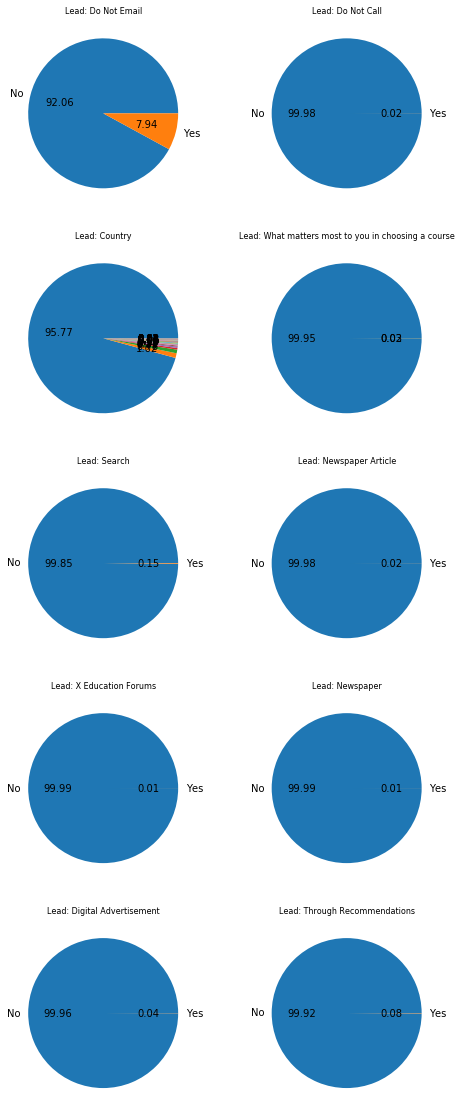

In [62]:
plt.figure(figsize=(8,20))
plt.subplot(5,2,1)
plt.pie(lead['Do Not Email'].value_counts(normalize=True), labels=['No', 'Yes'], autopct='%.2f')
plt.title("Lead: Do Not Email", fontsize=8)

plt.subplot(5,2,2)
plt.pie(lead['Do Not Call'].value_counts(normalize=True), labels=['No', 'Yes'], autopct='%.2f')
plt.title("Lead: Do Not Call", fontsize=8)

plt.subplot(5,2,3)
plt.pie(lead['Country'].value_counts(normalize=True), autopct='%.2f')
plt.title("Lead: Country", fontsize=8)

plt.subplot(5,2,4)
plt.pie(lead['What matters most to you in choosing a course'].value_counts(normalize=True), autopct='%.2f')
plt.title("Lead: What matters most to you in choosing a course", fontsize=8)

plt.subplot(5,2,5)
plt.pie(lead['Search'].value_counts(normalize=True), labels=['No', 'Yes'], autopct='%.2f')
plt.title("Lead: Search", fontsize=8)

plt.subplot(5,2,6)
plt.pie(lead['Newspaper Article'].value_counts(normalize=True), labels=['No', 'Yes'], autopct='%.2f')
plt.title("Lead: Newspaper Article", fontsize=8)

plt.subplot(5,2,7)
plt.pie(lead['X Education Forums'].value_counts(normalize=True), labels=['No', 'Yes'], autopct='%.2f')
plt.title("Lead: X Education Forums", fontsize=8)

plt.subplot(5,2,8)
plt.pie(lead['Newspaper'].value_counts(normalize=True), labels=['No', 'Yes'], autopct='%.2f')
plt.title("Lead: Newspaper", fontsize=8)

plt.subplot(5,2,9)
plt.pie(lead['Digital Advertisement'].value_counts(normalize=True), labels=['No', 'Yes'], autopct='%.2f')
plt.title("Lead: Digital Advertisement", fontsize=8)

plt.subplot(5,2,10)
plt.pie(lead['Through Recommendations'].value_counts(normalize=True), labels=['No', 'Yes'], autopct='%.2f')
plt.title("Lead: Through Recommendations", fontsize=8)

plt.show()

### <font color = brown> Dropping highly skewed columns
1. Do Not Email
2. Do Not Call
3. Country
4. What matters most to you in choosing a course
5. Search
6. Newspaper Article
7. X Education Forums
8. Newspaper
9. Digital Advertisement
10. Through Recommendations

In [63]:
lead.drop(['Do Not Email'
,'Do Not Call'
,'Country'
,'What matters most to you in choosing a course'
,'Search'
,'Newspaper Article'
,'X Education Forums'
,'Newspaper'
,'Digital Advertisement'
,'Through Recommendations'], axis=1, inplace=True)

## <font color = brown> Step 5: Dropping Unique Columns or only one field columns

In [64]:
lead['Magazine'].value_counts(normalize=True)

No    1.0
Name: Magazine, dtype: float64

In [65]:
lead['Receive More Updates About Our Courses'].value_counts(normalize=True)

No    1.0
Name: Receive More Updates About Our Courses, dtype: float64

In [66]:
lead['Update me on Supply Chain Content'].value_counts(normalize=True)

No    1.0
Name: Update me on Supply Chain Content, dtype: float64

In [67]:
lead['Get updates on DM Content'].value_counts(normalize=True)

No    1.0
Name: Get updates on DM Content, dtype: float64

In [68]:
lead['I agree to pay the amount through cheque'].value_counts(normalize=True)

No    1.0
Name: I agree to pay the amount through cheque, dtype: float64

In [69]:
lead.drop(['Magazine'
,'Receive More Updates About Our Courses'
, 'Update me on Supply Chain Content'
, 'Get updates on DM Content'
, 'I agree to pay the amount through cheque'], axis=1, inplace=True)

In [70]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,NaN,Unemployed,NaN,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,NaN,Unemployed,NaN,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,Student,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,NaN,Unemployed,Mumbai,No,Modified


## <font color = brown> Step 4: Impute Column with less percentage missing values

In [71]:
# validation
lead.isnull().mean().round(6)*100

Prospect ID                                0.0000
Lead Number                                0.0000
Lead Origin                                0.0000
Lead Source                                0.3896
Converted                                  0.0000
TotalVisits                                1.4827
Total Time Spent on Website                0.0000
Page Views Per Visit                       1.4827
Specialization                            36.5801
What is your current occupation           29.1126
City                                      39.7078
A free copy of Mastering The Interview     0.0000
Last Notable Activity                      0.0000
dtype: float64

### <font color = brown> Impute column: Lead Source

In [72]:
lead['Lead Source'].isnull().sum()

36

In [73]:
lead['Lead Source'].isnull().mean()*100

0.38961038961038963

In [74]:
lead['Lead Source'].value_counts(normalize=True)

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Social Media         0.000217
Press_Release        0.000217
Live Chat            0.000217
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
testone              0.000109
youtubechannel       0.000109
NC_EDM               0.000109
WeLearn              0.000109
blog                 0.000109
Name: Lead Source, dtype: float64

In [75]:
lead['Lead Source'].mode()

0    Google
dtype: object

In [76]:
lead['Lead Source'].fillna('Google', inplace=True)

In [77]:
lead['Lead Source'].isnull().sum()

0

### <font color = blue>Observation: Column- Lead Source (Catagorical)
    1. Null values:36 (0.38%)
    2. Checked mode
    3. Replacing null values with 'Google'

### <font color = brown> Impute column: TotalVisits

In [78]:
lead['TotalVisits'].isnull().sum()

137

In [79]:
lead['TotalVisits'].isnull().mean()*100

1.4826839826839828

In [80]:
lead['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [81]:
lead['TotalVisits'].median()

3.0

In [82]:
lead['TotalVisits'].mean()

3.445237833681204

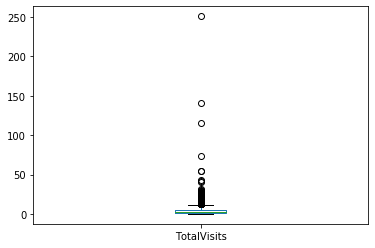

In [83]:
lead['TotalVisits'].plot(kind='box')
plt.show()

In [84]:
lead['TotalVisits'].fillna(3.0, inplace=True)

In [85]:
lead['TotalVisits'].isnull().sum()

0

### <font color = blue>Observation: Column- TotalVisits (Numerical)
    1. Null values: 137 (1.48%)
    2. Checked mean and median.
    3. Outliers are present.
    2. Replacing null values with median value: 3.0

### <font color = brown> Impute column: Page Views Per Visit

In [86]:
lead['Page Views Per Visit'].isnull().sum()

137

In [87]:
lead['Page Views Per Visit'].isnull().mean()*100

1.4826839826839828

In [88]:
lead['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

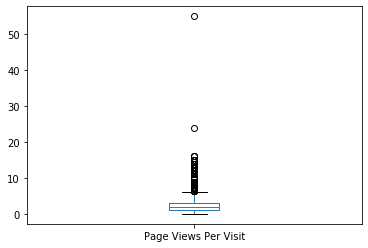

In [89]:
lead['Page Views Per Visit'].plot(kind='box')
plt.show()

In [90]:
lead['Page Views Per Visit'].mean()

2.3628199494672093

In [91]:
lead['Page Views Per Visit'].median()

2.0

In [92]:
lead['Page Views Per Visit'].fillna(2.0, inplace=True)

In [93]:
lead['Page Views Per Visit'].isnull().sum()

0

### <font color = blue>Observation: Column- Page Views Per Visit (Numerical)
    1. Null values: 137 (1.48%)
    2. Checked mean and median.
    3. Outliers are present.
    2. Replacing null values with median value: 2.0

In [94]:
# validation
lead.isnull().mean().round(6)*100

Prospect ID                                0.0000
Lead Number                                0.0000
Lead Origin                                0.0000
Lead Source                                0.0000
Converted                                  0.0000
TotalVisits                                0.0000
Total Time Spent on Website                0.0000
Page Views Per Visit                       0.0000
Specialization                            36.5801
What is your current occupation           29.1126
City                                      39.7078
A free copy of Mastering The Interview     0.0000
Last Notable Activity                      0.0000
dtype: float64

## <font color = brown> Step 5: Treatment of columns Missing values with high percentage
    Adding Other catagories for missing value columns

### <font color = brown> Specialization: Column treatment

In [95]:
lead['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [96]:
lead['Specialization'].isnull().sum()

3380

In [97]:
lead['Specialization'].fillna('other_Specialization', inplace=True)

In [98]:
lead['Specialization'].value_counts()

other_Specialization                 3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [99]:
lead['Specialization'].isnull().sum()

0

### <font color = blue>Observation: Column- Specialization
    1. Missing value 3380 (36.5%)
    2. Created new feild: other_Specialization

### <font color = brown> What is your current occupation: Column treatment

In [100]:
lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [101]:
lead['What is your current occupation'].isnull().sum()

2690

In [102]:
lead['What is your current occupation'].isnull().mean()*100

29.11255411255411

In [103]:
lead['What is your current occupation'].fillna('other_occupation', inplace=True)

In [104]:
lead['What is your current occupation'].value_counts()

Unemployed              5600
other_occupation        2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [105]:
lead['What is your current occupation'].isnull().sum()

0

### <font color = blue>Observation: Column- What is your current occupation
    1. Missing value 2690 (29.11%)
    2. Created new feild: other_occupation

### <font color = brown> City: Column treatment

In [106]:
lead['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [107]:
lead['City'].isnull().sum()

3669

In [108]:
lead['City'].isnull().mean()*100

39.70779220779221

In [109]:
lead['City'].fillna('other_city_created', inplace=True)

In [110]:
lead['City'].value_counts()

other_city_created             3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [111]:
lead['City'].isnull().sum()

0

### <font color = blue>Observation: Column- City
    1. Missing value 3669 (39.70%)
    2. Created new feild: other_city_created

In [112]:
# Validation
lead.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Specialization                            0
What is your current occupation           0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

## <font color = brown>Step 6: Converting binary variables (Yes/No) to 0/1
    1. A free copy of Mastering The Interview: Column

In [113]:
lead['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [114]:
lead['A free copy of Mastering The Interview'] = lead['A free copy of Mastering The Interview'].apply(lambda x: 1 if x=='Yes' else 0)

In [115]:
lead['A free copy of Mastering The Interview'].value_counts()

0    6352
1    2888
Name: A free copy of Mastering The Interview, dtype: int64

## <font color = brown>Step 7: Outlier validation and treatment

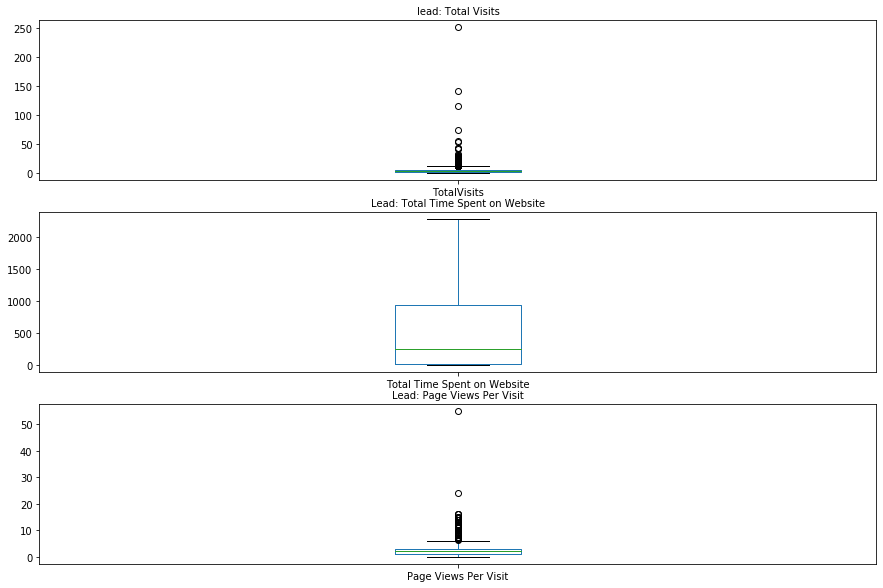

In [116]:
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
lead['TotalVisits'].plot(kind='box')
plt.title('lead: Total Visits', fontsize = 10) 

plt.subplot(3,1,2)
lead['Total Time Spent on Website'].plot(kind='box')
plt.title('Lead: Total Time Spent on Website', fontsize = 10) 

plt.subplot(3,1,3)
lead['Page Views Per Visit'].plot(kind='box')
plt.title('Lead: Page Views Per Visit', fontsize = 10) 

plt.show()

### <font color = brown> Validating Column: TotalVisits

In [117]:
lead['TotalVisits'].quantile(0.99)

17.0

In [118]:
lead['TotalVisits'].describe()

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [119]:
lead[lead['TotalVisits']>17].count()

Prospect ID                               83
Lead Number                               83
Lead Origin                               83
Lead Source                               83
Converted                                 83
TotalVisits                               83
Total Time Spent on Website               83
Page Views Per Visit                      83
Specialization                            83
What is your current occupation           83
City                                      83
A free copy of Mastering The Interview    83
Last Notable Activity                     83
dtype: int64

### <font color = brown> Validating Column: Page Views Per Visit

In [120]:
lead['Page Views Per Visit'].quantile(0.99)

9.0

In [121]:
lead['Page Views Per Visit'].describe()

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [122]:
lead[lead['Page Views Per Visit']>9].count()

Prospect ID                               75
Lead Number                               75
Lead Origin                               75
Lead Source                               75
Converted                                 75
TotalVisits                               75
Total Time Spent on Website               75
Page Views Per Visit                      75
Specialization                            75
What is your current occupation           75
City                                      75
A free copy of Mastering The Interview    75
Last Notable Activity                     75
dtype: int64

### <font color = blue> Outlier Treatment: Soft capping of 1% & 99% 

In [123]:
TotalVisits_q4 = lead['TotalVisits'].quantile(0.99)
lead['TotalVisits'][lead['TotalVisits']>= TotalVisits_q4] = TotalVisits_q4

PagesVisit_q4 = lead['Page Views Per Visit'].quantile(0.99)
lead['Page Views Per Visit'][lead['Page Views Per Visit']>= PagesVisit_q4] = PagesVisit_q4

In [124]:
# validation
print(lead['TotalVisits'].max())
print(lead['Page Views Per Visit'].max())

17.0
9.0


## <font color = brown>Step 8: Checking Catagorical column with multiple fields and treatment

In [125]:
lead.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Specialization                            0
What is your current occupation           0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

### <font color = brown> Lead Source: Column

In [126]:
lead['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
Pay per Click Ads       1
welearnblog_Home        1
testone                 1
youtubechannel          1
NC_EDM                  1
WeLearn                 1
blog                    1
Name: Lead Source, dtype: int64

In [127]:
lead['Lead Source'] = lead['Lead Source'].replace(['Facebook','Click2call','Press_Release','bing','Live Chat','Social Media','blog','Pay per Click Ads','testone','NC_EDM','WeLearn', 'welearnblog_Home', 'youtubechannel'],'other_lead_source')

In [128]:
lead['Lead Source'] = lead['Lead Source'].replace(['google'],'Google')

In [129]:
lead['Lead Source'].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
other_lead_source      78
Name: Lead Source, dtype: int64

### <font color = blue>Observation: Column- Lead Source
    1. new filed created: other_lead_source

### <font color = brown> Specialization: Column

In [130]:
lead['Specialization'].value_counts()

other_Specialization                 3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [131]:
# checking percentage
lead['Specialization'].value_counts(normalize=True)*100

other_Specialization                 36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [132]:
# lead['Specialization'] = lead['Specialization'].replace(['Business Administration','IT Projects Management','Supply Chain Management','Banking, Investment And Insurance','Travel and Tourism','Media and Advertising','International Business','Healthcare Management','Hospitality Management','E-COMMERCE','Retail Management','Rural and Agribusiness','E-Business','Services Excellence'], 'other_Specialization')

In [133]:
lead['Specialization'].value_counts()

other_Specialization                 3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

### <font color = blue>Observation: Column- Specialization
    1. Any field less then 5% was merged to exisiting 'other_Specialization' field

### <font color = brown> Current Occupation: Column

In [134]:
lead['What is your current occupation'].value_counts()

Unemployed              5600
other_occupation        2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [135]:
lead['What is your current occupation'] = lead['What is your current occupation'].replace(['Other', 'Housewife', 'Businessman'],'other_occupation')

In [136]:
lead['What is your current occupation'].value_counts()

Unemployed              5600
other_occupation        2724
Working Professional     706
Student                  210
Name: What is your current occupation, dtype: int64

### <font color = blue>Observation: Column- Current Occupation
    1. Merged filed data for Other / Housewife, Business to other_occupation

In [137]:
lead['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [138]:
# Checking percentage
lead['Last Notable Activity'].value_counts(normalize=True)*100

Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Form Submitted on Website        0.010823
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Email Received                   0.010823
Name: Last Notable Activity, dtype: float64

In [139]:
lead['Last Notable Activity'] = lead['Last Notable Activity'].replace(['Email Marked Spam','Form Submitted on Website','Form Submitted on Website','Approached upfront','Resubscribed to emails','Resubscribed to emails','View in browser link Clicked','Email Received'],'other_last_notable_activity')

In [140]:
lead['Last Notable Activity'].value_counts()

Modified                       3407
Email Opened                   2827
SMS Sent                       2172
Page Visited on Website         318
Olark Chat Conversation         183
Email Link Clicked              173
Email Bounced                    60
Unsubscribed                     47
Unreachable                      32
Had a Phone Conversation         14
other_last_notable_activity       7
Name: Last Notable Activity, dtype: int64

### <font color = blue>Observation: Column- Last Notable Activity
    1. merged fields to 'other_last_notable_activity'

# <font color = brown> EDA

In [141]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  City                                    9240 non-null   obje

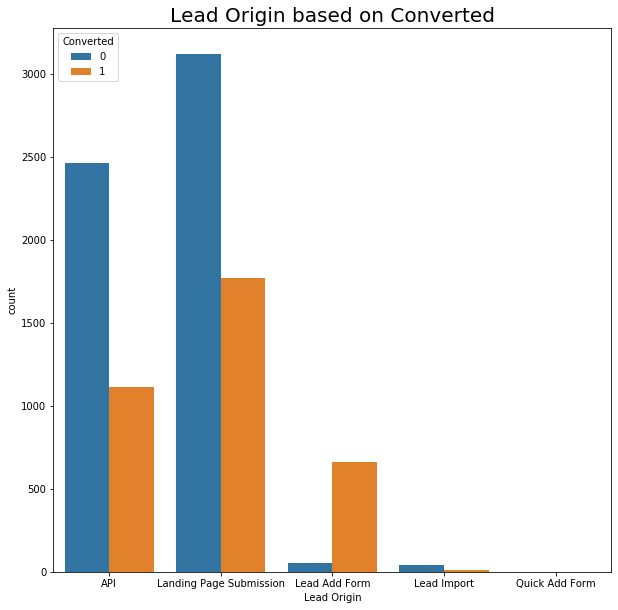

In [142]:
# Lead Origin based on Converted
plt.figure(figsize=(10,10))
sns.countplot(lead['Lead Origin'], hue=lead['Converted'])
plt.title("Lead Origin based on Converted", fontsize=20)

plt.show()

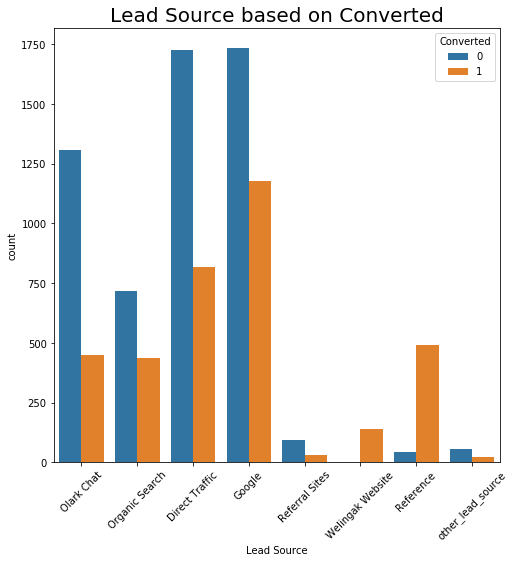

In [143]:
# Lead Source based on Converted
plt.figure(figsize=(8,8))
sns.countplot(lead['Lead Source'], hue=lead['Converted'])
plt.title("Lead Source based on Converted", fontsize=20)
plt.xticks(rotation=45)
plt.show()

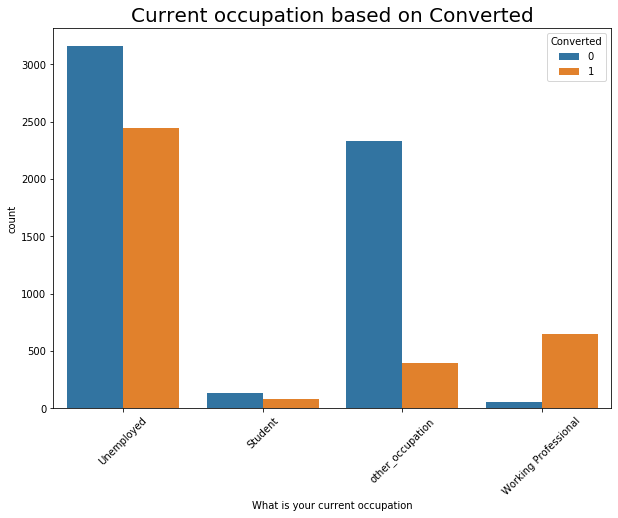

In [144]:
# Current occupation based on Converted
plt.figure(figsize=(10,7))
sns.countplot(lead['What is your current occupation'], hue=lead['Converted'])
plt.title("Current occupation based on Converted", fontsize=20)
plt.xticks(rotation=45)
plt.show()

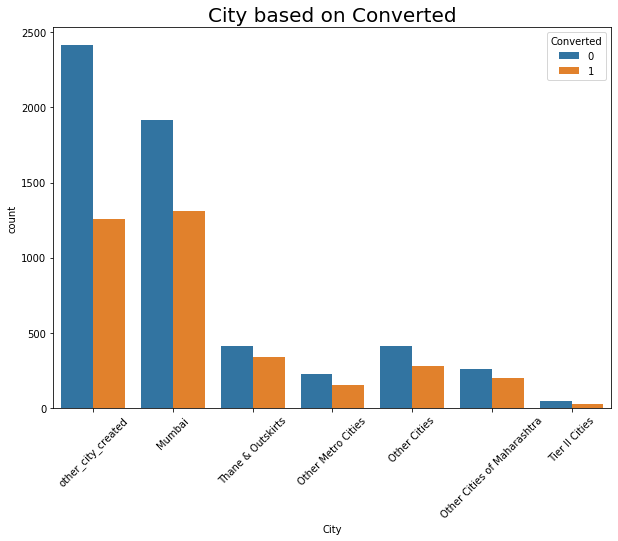

In [145]:
# City based on Converted
plt.figure(figsize=(10,7))
sns.countplot(lead['City'], hue=lead['Converted'])
plt.title("City based on Converted", fontsize=20)
plt.xticks(rotation=45)
plt.show()

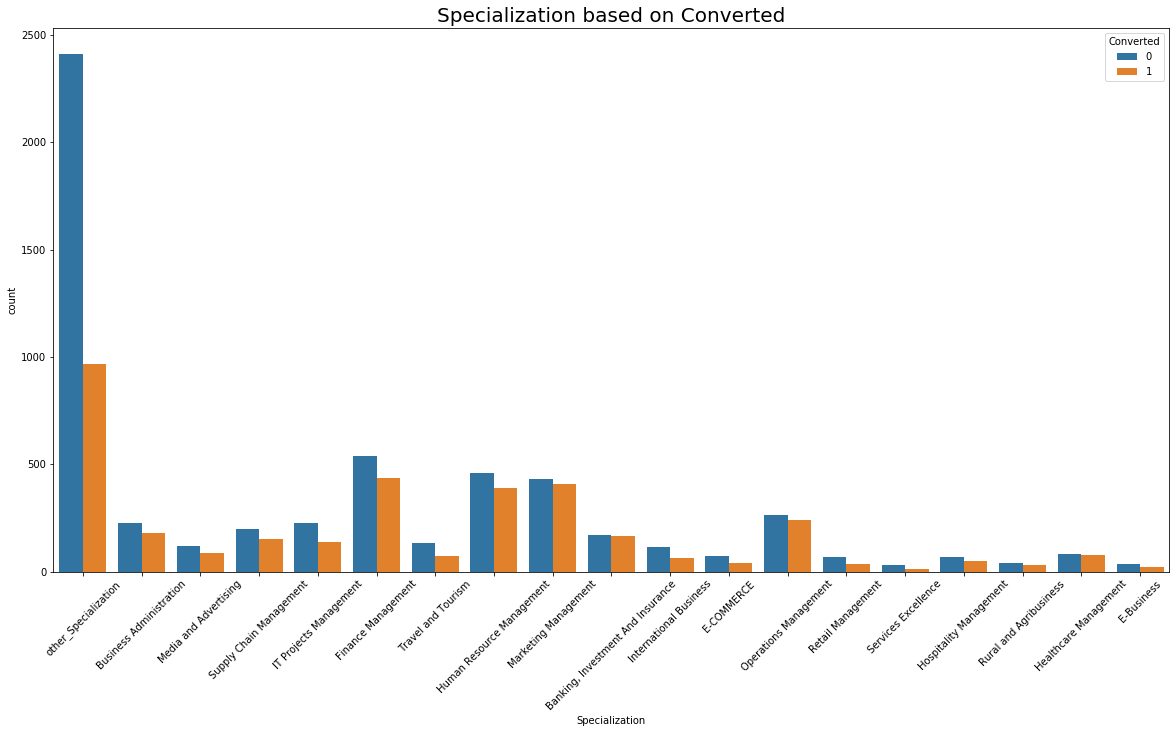

In [146]:
# Specialization based on Converted
plt.figure(figsize=(20,10))
sns.countplot(lead['Specialization'], hue=lead['Converted'])
plt.title("Specialization based on Converted", fontsize=20)
plt.xticks(rotation=45)
plt.show()

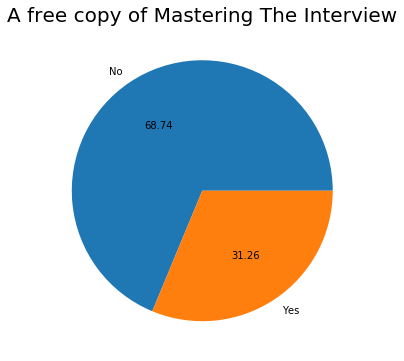

In [147]:
# A free copy of Mastering The Interview
plt.figure(figsize=(10,6))
plt.pie(lead['A free copy of Mastering The Interview'].value_counts(normalize=True), labels=['No', 'Yes'], autopct='%.2f')
plt.title('A free copy of Mastering The Interview', fontsize=20)
plt.show()

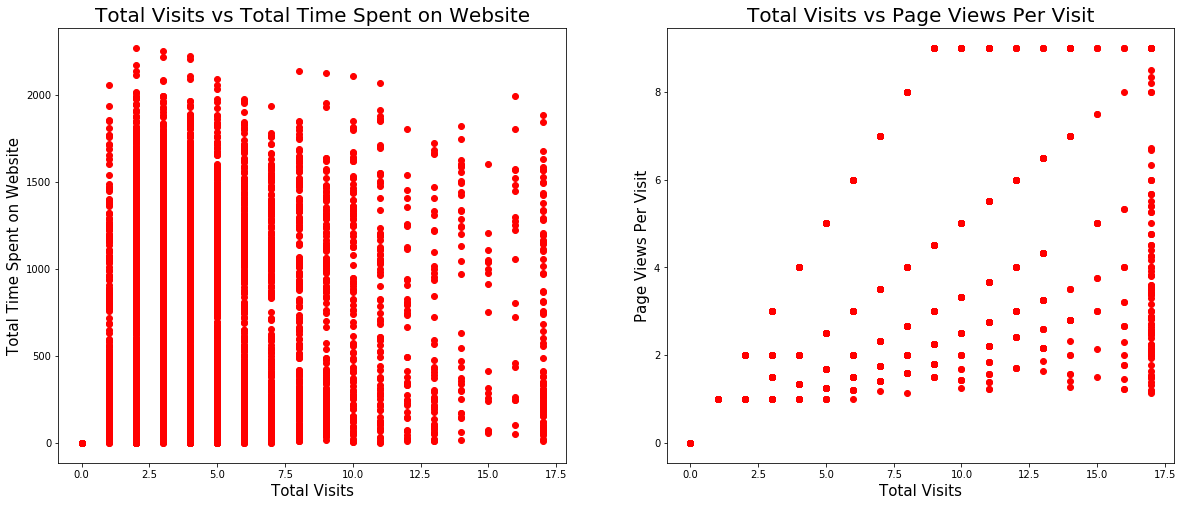

In [148]:
# Scatter Plot
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.scatter(lead['TotalVisits'], lead['Total Time Spent on Website'], color='red')
plt.title('Total Visits vs Total Time Spent on Website', fontsize=20)
plt.xlabel("Total Visits", fontsize=15)
plt.ylabel("Total Time Spent on Website", fontsize=15)

plt.subplot(1,2,2)
plt.scatter(lead['TotalVisits'], lead['Page Views Per Visit'], color='red')
plt.title('Total Visits vs Page Views Per Visit', fontsize=20)
plt.xlabel("Total Visits", fontsize=15)
plt.ylabel("Page Views Per Visit", fontsize=15)
plt.show()


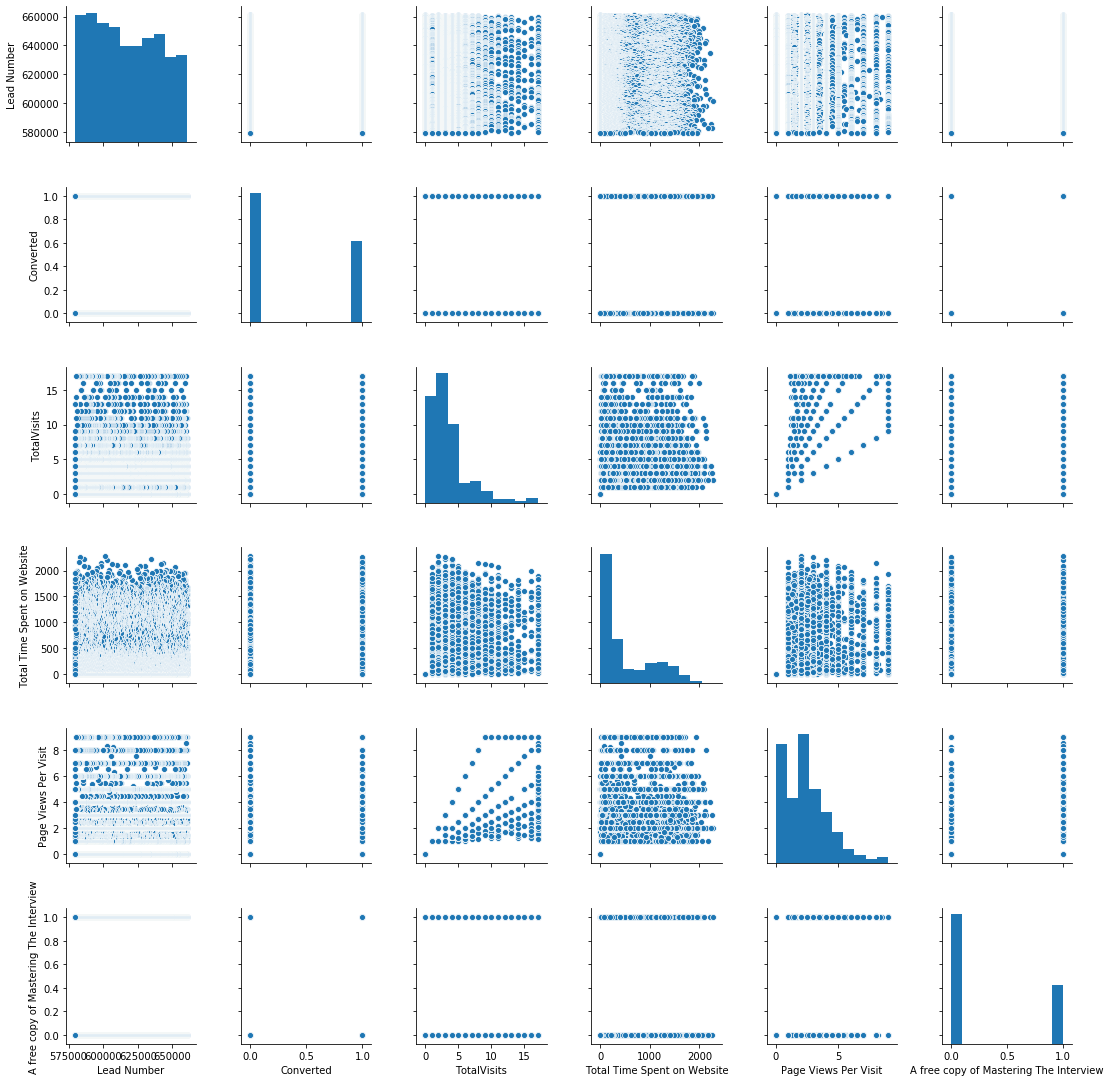

In [149]:
# Pair Plot
sns.pairplot(lead)
plt.show()

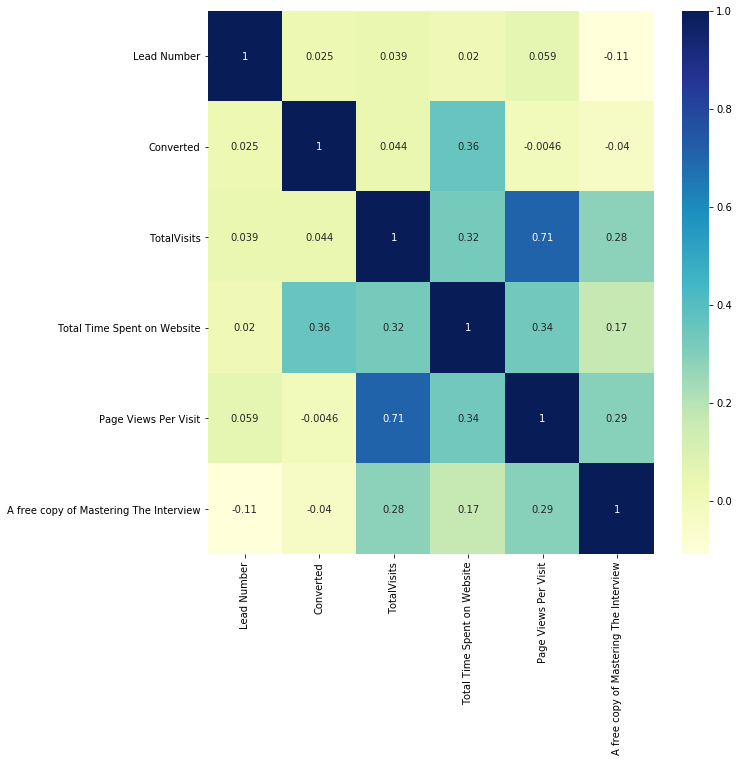

In [150]:
# Correlation map
plt.figure(figsize = (10, 10))
sns.heatmap(lead.corr(), annot = True, cmap="YlGnBu")
plt.show()

### <font color = blue>Observation: EDA
1.	Lead Origin: Landing page Submission has highest count with maximum number of submission followed by API.
2.	Lead Source: Google has the highest count with maximum conversion. They should put more advertising on Google. In terms of Converted percentage, Other_Lead_Source has highest percentage but problem is source is missing to identify. Direct traffic is also good contributor for lead conversion.
3.	Current Occupation: seems like, unemployed is highest group with most conversion. In terms of Working Profession, conversion percentage is very high. For longer run, Working Professional will be good focus area for company.
4.	City: Seems like, company should focus on Mumbai but there is lot of opportunity to expand to other cities.
5.	Specialization: This seems to very scattered with most of the specialization under other section or very small section.
6.	Positive correlation between Converted and Time spend on website


# <font color = brown> Data Preparation

## <font color = brown> Step 1: Create Dummies for catagorical columns

In [151]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,other_Specialization,Unemployed,other_city_created,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,other_Specialization,Unemployed,other_city_created,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,Student,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,other_Specialization,Unemployed,Mumbai,0,Modified


In [152]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  City                                    9240 non-null   obje

### <font color = brown> Dummies to be created for:
1. Lead Origin
2. Lead Source
3. Specialization
4. What is your current occupation
5. City
6. Last Notable Activity

In [153]:
dummy1 = pd.get_dummies(lead['Lead Origin'], drop_first=True)
dummy2 = pd.get_dummies(lead['Lead Source'], drop_first=True)
dummy3 = pd.get_dummies(lead['Specialization'], drop_first=True)
dummy4 = pd.get_dummies(lead['What is your current occupation'], drop_first=True)
dummy5 = pd.get_dummies(lead['City'], drop_first=True)
dummy6 = pd.get_dummies(lead['Last Notable Activity'], drop_first=True)

In [154]:
lead = pd.concat([lead, dummy1,dummy2,dummy3,dummy4,dummy5,dummy6], axis=1)

In [155]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Google,Olark Chat,Organic Search,Reference,Referral Sites,Welingak Website,other_lead_source,Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,other_Specialization,Unemployed,Working Professional,other_occupation,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Tier II Cities,other_city_created,Email Link Clicked,Email Opened,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,SMS Sent,Unreachable,Unsubscribed,other_last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,other_Specialization,Unemployed,other_city_created,0,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,other_Specialization,Unemployed,other_city_created,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,Student,Mumbai,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,other_Specialization,Unemployed,Mumbai,0,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [156]:
lead.shape

(9240, 61)

### <font color = brown> droping original columns

In [157]:
lead.drop([
'Lead Origin'
,'Lead Source'
,'Specialization'
,'What is your current occupation'
,'City'
,'Last Notable Activity'], inplace=True, axis=1)

In [158]:
lead.shape

(9240, 55)

In [159]:
lead.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Google,Olark Chat,Organic Search,Reference,Referral Sites,Welingak Website,other_lead_source,Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,other_Specialization,Unemployed,Working Professional,other_occupation,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Tier II Cities,other_city_created,Email Link Clicked,Email Opened,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,SMS Sent,Unreachable,Unsubscribed,other_last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### <font color = brown> Droping columns created data cleaning for Missing data: Other

In [160]:
lead.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Google,Olark Chat,Organic Search,Reference,Referral Sites,Welingak Website,other_lead_source,Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,other_Specialization,Unemployed,Working Professional,other_occupation,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Tier II Cities,other_city_created,Email Link Clicked,Email Opened,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,SMS Sent,Unreachable,Unsubscribed,other_last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [161]:
# Dropping Other Columns
lead.drop(['other_lead_source', 'other_Specialization', 'other_occupation', 'other_city_created', 'other_last_notable_activity'], axis=1, inplace=True)

In [162]:
lead.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Google,Olark Chat,Organic Search,Reference,Referral Sites,Welingak Website,Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Unemployed,Working Professional,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Tier II Cities,Email Link Clicked,Email Opened,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,SMS Sent,Unreachable,Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [163]:
lead.shape

(9240, 50)

## <font color = blue> Droped columns:
    1. other_lead_source
    2. other_Specialization
    3. other_occupation
    4. other_city_created
    5. other_last_notable_activity

## <font color = brown> Step2: Dividing data set  to train and test
1. train data set : 70%
2. test data set: 30%

In [164]:
# Creating X
lead_X=lead.drop(['Prospect ID', 'Lead Number', 'Converted'], axis=1)
lead_X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Google,Olark Chat,Organic Search,Reference,Referral Sites,Welingak Website,Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Unemployed,Working Professional,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Tier II Cities,Email Link Clicked,Email Opened,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,SMS Sent,Unreachable,Unsubscribed
0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [165]:
lead_X.shape

(9240, 47)

In [166]:
#lead_y_temp=pd.DataFrame(lead, columns=['Lead Number', 'Converted'])
#lead_y_temp.set_index('Lead Number', inplace=True)
#lead_y_temp.head()

In [167]:
#lead_y_temp.reset_index(inplace=True)
#lead_y_temp.head()

In [168]:
# Creating Y
lead_y=lead['Converted']
lead_y.shape

(9240,)

In [169]:
lead_y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [170]:
# Splitting of data
lead_X_train, lead_X_test, lead_y_train, lead_y_test = train_test_split(lead_X, lead_y, train_size=0.7, test_size=0.3, random_state=100)

In [171]:
# Validation post split
lead_X_train.shape

(6468, 47)

In [172]:
lead_X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Google,Olark Chat,Organic Search,Reference,Referral Sites,Welingak Website,Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Unemployed,Working Professional,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Tier II Cities,Email Link Clicked,Email Opened,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,SMS Sent,Unreachable,Unsubscribed
1871,0.0,0,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6795,4.0,487,1.33,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3516,5.0,106,2.50,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8105,5.0,1230,5.00,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3934,0.0,0,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [173]:
# Validation post split
lead_y_train.shape

(6468,)

In [174]:
# Validation post split
lead_X_test.shape

(2772, 47)

In [175]:
# Validation post split
lead_y_test.shape

(2772,)

In [176]:
lead_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1871 to 5640
Data columns (total 47 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   TotalVisits                             6468 non-null   float64
 1   Total Time Spent on Website             6468 non-null   int64  
 2   Page Views Per Visit                    6468 non-null   float64
 3   A free copy of Mastering The Interview  6468 non-null   int64  
 4   Landing Page Submission                 6468 non-null   uint8  
 5   Lead Add Form                           6468 non-null   uint8  
 6   Lead Import                             6468 non-null   uint8  
 7   Quick Add Form                          6468 non-null   uint8  
 8   Google                                  6468 non-null   uint8  
 9   Olark Chat                              6468 non-null   uint8  
 10  Organic Search                          6468 non-null   u

## <font color = brown> Step3: Scaling of Data: Standardization

In [177]:
# Scaling of Data Set
#lead_X_train_scale = scaler.fit_transform(lead_X_train)
#lead_X_train_scale
scaler = StandardScaler()
lead_X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(lead_X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
lead_X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(lead_X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

#lead_X_train.head()

In [178]:
# Validation post scaling of Train Data Set
lead_X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Google,Olark Chat,Organic Search,Reference,Referral Sites,Welingak Website,Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Unemployed,Working Professional,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Tier II Cities,Email Link Clicked,Email Opened,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,SMS Sent,Unreachable,Unsubscribed
1871,-1.022595,-0.885371,-1.180474,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6795,0.205373,0.005716,-0.503379,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3516,0.512365,-0.691418,0.092260,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8105,0.512365,1.365219,1.364995,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3934,-1.022595,-0.885371,-1.180474,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [179]:
# Validation post scaling of Train Data Set
lead_X_train.shape

(6468, 47)

In [180]:
# # Validation post scaling of Test Data Set
lead_X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Google,Olark Chat,Organic Search,Reference,Referral Sites,Welingak Website,Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Unemployed,Working Professional,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Tier II Cities,Email Link Clicked,Email Opened,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,SMS Sent,Unreachable,Unsubscribed
4269,1.433341,0.964504,2.892276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2376,-1.022595,-0.885371,-1.180474,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7766,0.512365,-0.777416,1.364995,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
9199,-1.022595,-0.885371,-1.180474,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4359,-1.022595,-0.885371,-1.180474,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [181]:
# Validation post scaling of Test Data Set
lead_X_test.shape

(2772, 47)

## <font color = brown> Checking Correlation

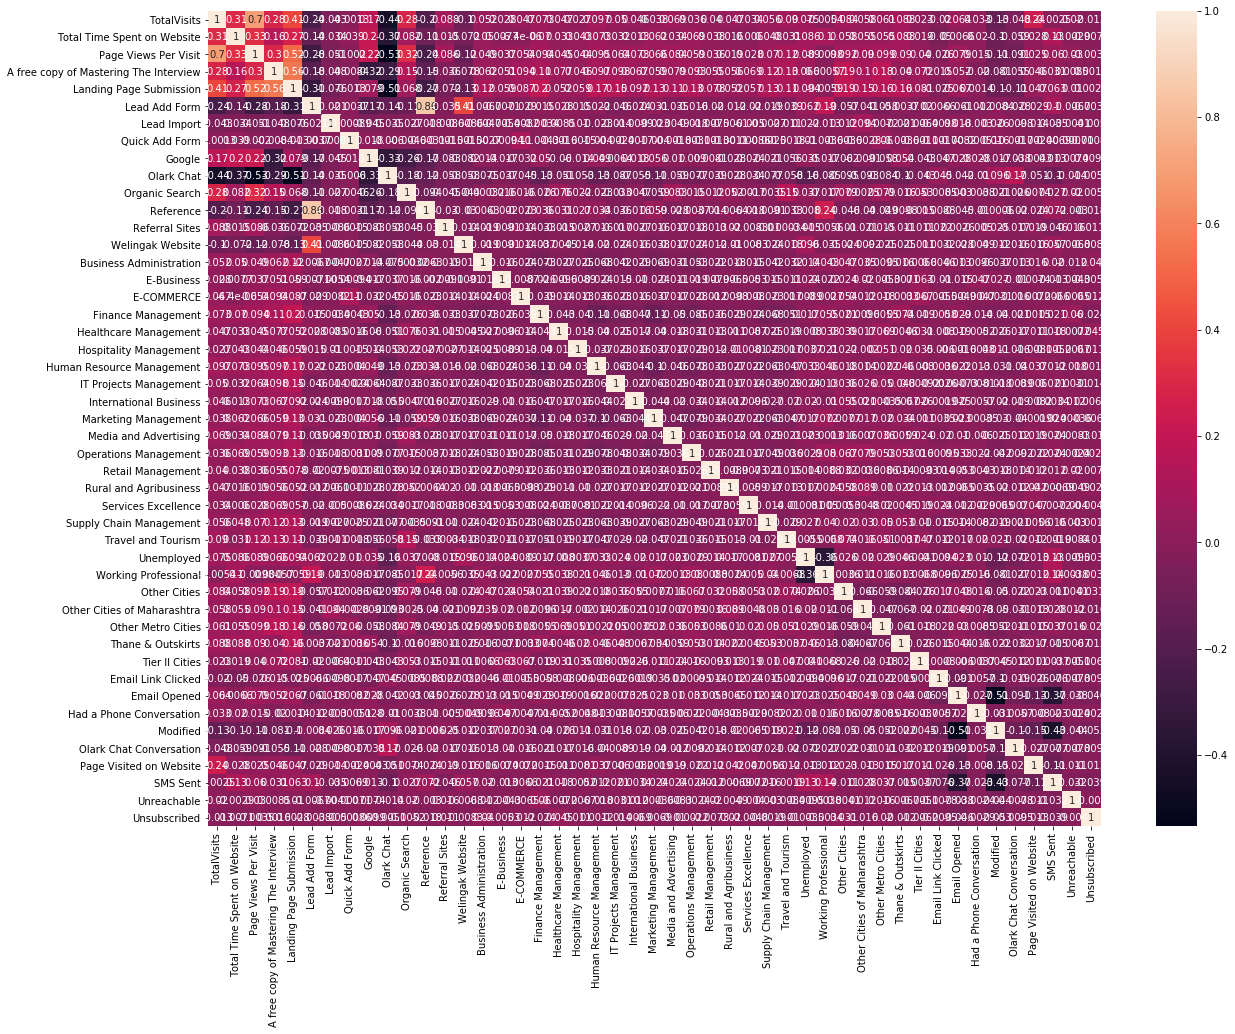

In [182]:
plt.figure(figsize = (20,15))
sns.heatmap(lead_X_train.corr(),annot = True)
plt.show()

# <font color = brown> Model Building

In [183]:
# lead_y_train_sm = lead_y_train.values.reshape(-1,1)

### <font color = brown> Step1: 1st Model on train data

In [184]:
# Logistic regression model
lead_X_train_sm= sm.add_constant(lead_X_train) #Adding Contstant
logmodel1 = sm.GLM(lead_y_train,lead_X_train_sm, family = sm.families.Binomial())
logmodel1 = logmodel1.fit()
logmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6420
Model Family:                Binomial   Df Model:                           47
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2626.9
Date:                Mon, 26 Oct 2020   Deviance:                       5253.8
Time:                        22:55:04   Pearson chi2:                 6.96e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.8483      0.449     -6.343      0.000      -3.728      -1.968
TotalVisits                                0.2950      0.049      5.967      0.000       0.198       0.392
Total Time Spent on Website                1.0993      0.040     27.186      0.000       1.020       1.179
Page Views Per Visit                      -0.2106      0.056     -3.768      0.000      -0.320      -0.101
A free copy of Mastering The Interview    -0.1724      0.107     -1.605      0.108      -0.383       0.038
Landing Page Submission                   -0.6275      0.130     -4.820      0.000      -0.883      -0.372
Lead Add Form                              2.4677      0.473      5.220      0.000       1.541       3.394
Lead Import                                0.1339      0.533      0.251      0.802      -0.910       1.178
Quick Add Form                            17.5795   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Google                                     0.2956      0.113      2.617      0.009       0.074       0.517
Olark Chat                                 1.2436      0.160      7.761      0.000       0.930       1.558
Organic Search                             0.0711      0.131      0.541      0.589      -0.186       0.329
Reference                                  1.1289      0.511      2.208      0.027       0.127       2.131
Referral Sites                             0.0283      0.323      0.088      0.930      -0.605       0.661
Welingak Website                           3.2181      0.861      3.736      0.000       1.530       4.907
Business Administration                    0.5456      0.195      2.799      0.005       0.164       0.928
E-Business                                 0.7479      0.483      1.549      0.121      -0.198       1.694
E-COMMERCE                                 0.9460      0.318      2.970      0.003       0.322       1.570
Finance Management                         0.8175      0.149      5.496      0.000       0.526       1.109
Healthcare Management                      0.8466      0.291      2.909      0.004       0.276       1.417
Hospitality Management                    -0.3307      0.343     -0.965      0.335      -1.003       0.341
Human Resource Management                  0.6269      0.152      4.123      0.000       0.329       0.925
IT Projects Management                     0.7859      0.208      3.777      0.000       0.378       1.194
International Business                     0.2649      0.271      0.978      0.328      -0.266       0.796
Marketing Management                       0.6446      0.148      4.370      0.000       0.355       0.934
Media and Advertising                      0.8013      0.250      3.200      0.001     

### <font color = blue>Observation: 1st Model
1.There are many variables, whose p-values are high, implying that that variable is statistically insignificant. So we need to eliminate some of the variables in order to build a better model.

### <font color = brown> Step2: Recursive Feature Elimination (RFE): 20 features

In [185]:
# RFE process with 20 features
logref = LogisticRegression()
rfe_train = RFE(logref, 20)
rfe_train=rfe_train.fit(lead_X_train, lead_y_train)

In [186]:
rfe_train.support_

array([False,  True, False, False,  True,  True, False, False, False,
        True, False,  True, False,  True, False, False,  True,  True,
        True, False, False,  True, False,  True,  True, False, False,
        True, False, False, False,  True,  True, False, False, False,
       False, False, False, False,  True,  True,  True, False,  True,
        True, False])

In [187]:
# Checking ranking for each features. Features with Rank 1 will be taken forward
list(zip(lead_X_train.columns, rfe_train.support_, rfe_train.ranking_))

[('TotalVisits', False, 13),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 15),
 ('A free copy of Mastering The Interview', False, 17),
 ('Landing Page Submission', True, 1),
 ('Lead Add Form', True, 1),
 ('Lead Import', False, 24),
 ('Quick Add Form', False, 25),
 ('Google', False, 12),
 ('Olark Chat', True, 1),
 ('Organic Search', False, 26),
 ('Reference', True, 1),
 ('Referral Sites', False, 28),
 ('Welingak Website', True, 1),
 ('Business Administration', False, 6),
 ('E-Business', False, 7),
 ('E-COMMERCE', True, 1),
 ('Finance Management', True, 1),
 ('Healthcare Management', True, 1),
 ('Hospitality Management', False, 9),
 ('Human Resource Management', False, 2),
 ('IT Projects Management', True, 1),
 ('International Business', False, 16),
 ('Marketing Management', True, 1),
 ('Media and Advertising', True, 1),
 ('Operations Management', False, 3),
 ('Retail Management', False, 27),
 ('Rural and Agribusiness', True, 1),
 ('Services Excellence', Fa

In [188]:
# all 20 variable
col = lead_X_train.columns[rfe_train.support_]
col

Index(['Total Time Spent on Website', 'Landing Page Submission',
       'Lead Add Form', 'Olark Chat', 'Reference', 'Welingak Website',
       'E-COMMERCE', 'Finance Management', 'Healthcare Management',
       'IT Projects Management', 'Marketing Management',
       'Media and Advertising', 'Rural and Agribusiness', 'Unemployed',
       'Working Professional', 'Had a Phone Conversation', 'Modified',
       'Olark Chat Conversation', 'SMS Sent', 'Unreachable'],
      dtype='object')

In [189]:
# Not taken, dropped column obove 20 selected columns
lead_X_train.columns[~rfe_train.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Import',
       'Quick Add Form', 'Google', 'Organic Search', 'Referral Sites',
       'Business Administration', 'E-Business', 'Hospitality Management',
       'Human Resource Management', 'International Business',
       'Operations Management', 'Retail Management', 'Services Excellence',
       'Supply Chain Management', 'Travel and Tourism', 'Other Cities',
       'Other Cities of Maharashtra', 'Other Metro Cities',
       'Thane & Outskirts', 'Tier II Cities', 'Email Link Clicked',
       'Email Opened', 'Page Visited on Website', 'Unsubscribed'],
      dtype='object')

In [190]:
# Creating X_test dataframe with RFE selected variables
lead_X_train = lead_X_train[col]

In [191]:
lead_X_train.head()

,Total Time Spent on Website,Landing Page Submission,Lead Add Form,Olark Chat,Reference,Welingak Website,E-COMMERCE,Finance Management,Healthcare Management,IT Projects Management,Marketing Management,Media and Advertising,Rural and Agribusiness,Unemployed,Working Professional,Had a Phone Conversation,Modified,Olark Chat Conversation,SMS Sent,Unreachable
1871,-0.885371,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
6795,0.005716,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3516,-0.691418,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8105,1.365219,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3934,-0.885371,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [192]:
lead_X_train.shape

(6468, 20)

## <font color = brown> Step3: Model Builing post RFE

### <font color = brown> 2nd Model based on RFE

In [193]:
lead_X_train.shape

(6468, 20)

In [194]:
# Logistic regression model
lead_X_train_sm= sm.add_constant(lead_X_train)
logmodel2 = sm.GLM(lead_y_train,lead_X_train_sm, family = sm.families.Binomial())
logmodel2 = logmodel2.fit()
logmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2679.2
Date:                Mon, 26 Oct 2020   Deviance:                       5358.4
Time:                        22:55:08   Pearson chi2:                 6.87e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.7780      0.106    -16.719      0.000      -1.986      -1.570
Total Time Spent on Website     1.1177      0.040     28.121      0.000       1.040       1.196
Landing Page Submission        -0.4599      0.093     -4.937      0.000      -0.642      -0.277
Lead Add Form                   2.4888      0.466      5.346      0.000       1.576       3.401
Olark Chat                      0.9786      0.118      8.293      0.000       0.747       1.210
Reference                       1.0124      0.497      2.035      0.042       0.037       1.987
Welingak Website                2.8510      0.854      3.340      0.001       1.178       4.524
E-COMMERCE                      0.5024      0.297      1.689      0.091      -0.081       1.085
Finance Management              0.4447      0.117      3.805      0.000       0.216       0.674
Healthcare Management           0.4566      0.269      1.699      0.089      -0.070       0.983
IT Projects Management          0.3748      0.184      2.033      0.042       0.014       0.736
Marketing Management            0.2792      0.121      2.317      0.021       0.043       0.516
Media and Advertising           0.3971      0.233      1.703      0.089      -0.060       0.854
Rural and Agribusiness          0.8534      0.389      2.196      0.028       0.092       1.615
Unemployed                      0.9101      0.082     11.101      0.000       0.749       1.071
Working Professional            3.4325      0.196     17.514      0.000       3.048       3.817
Had a Phone Conversation        3.5695      1.105      3.229      0.001       1.403       5.736
Modified                       -0.7135      0.084     -8.531      0.000      -0.877      -0.550
Olark Chat Conversation        -1.1223      0.335     -3.346      0.001      -1.780      -0.465
SMS Sent                        1.2503      0.085     14.719      0.000       1.084       1.417
Unreachable                     1.6911      0.532      3.178      0.001       0.648       2.734
===============================================================================================
"""

In [195]:
# Checking VIF value
vif = pd.DataFrame()
X = lead_X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Add Form,15.98
4,Reference,12.93
5,Welingak Website,3.76
1,Landing Page Submission,2.68
13,Unemployed,2.44
16,Modified,1.63
18,SMS Sent,1.61
3,Olark Chat,1.58
14,Working Professional,1.35
0,Total Time Spent on Website,1.25


In [196]:
# Getting the predicted values on the train set
lead_y_train_pred = logmodel2.predict(lead_X_train_sm)
lead_y_train_pred[ :5]

1871    0.354417
6795    0.210588
3516    0.340261
8105    0.809757
3934    0.169040
dtype: float64

In [197]:
lead_y_train_pred = lead_y_train_pred.values.reshape(-1)
lead_y_train_pred[:10]

array([0.35441749, 0.21058829, 0.34026075, 0.80975705, 0.16903995,
       0.98930338, 0.21582965, 0.98447802, 0.14011336, 0.93017132])

In [198]:
# Creating a dataframe with the actual Converted and predicted Converted probabilities
y_train_pred_final = pd.DataFrame({'Converted':lead_y_train.values, 'Converted_Prob':lead_y_train_pred})
y_train_pred_final['Sr. Number'] = lead_y_train.index
y_train_pred_final.head(10)

,Converted,Converted_Prob,Sr. Number
0,0,0.354417,1871
1,0,0.210588,6795
2,0,0.340261,3516
3,0,0.809757,8105
4,0,0.169040,3934
5,1,0.989303,4844
6,0,0.215830,3297
7,1,0.984478,8071
8,0,0.140113,987
9,1,0.930171,7423


### <font color = brown>Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [199]:
# Checking Prediction
y_train_pred_final['Convert_Predict'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(10)

,Converted,Converted_Prob,Sr. Number,Convert_Predict
0,0,0.354417,1871,0
1,0,0.210588,6795,0
2,0,0.340261,3516,0
3,0,0.809757,8105,1
4,0,0.169040,3934,0
5,1,0.989303,4844,1
6,0,0.215830,3297,0
7,1,0.984478,8071,1
8,0,0.140113,987,0
9,1,0.930171,7423,1


## <font color = brown> Confusion matrix

In [200]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Convert_Predict )
print(confusion)

[[3567  435]
 [ 751 1715]]


In [201]:
# overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Convert_Predict))

0.8166357452071737


### <font color = blue>Observation: Overall Accuracy: 81.66%. 

### <font color = brown> 3rd Model

### <font color = blue> Observation: Dropping column: E-COMMERCE has high P-value 0.091

In [202]:
lead_X_train.shape

(6468, 20)

In [203]:
# Dropping Column
lead_X_train = lead_X_train.drop(['E-COMMERCE'], axis=True)

In [204]:
lead_X_train.shape

(6468, 19)

In [205]:
# Logistic regression model
lead_X_train_sm= sm.add_constant(lead_X_train)
logmodel3 = sm.GLM(lead_y_train,lead_X_train_sm, family = sm.families.Binomial())
logmodel3 = logmodel3.fit()
logmodel3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2680.6
Date:                Mon, 26 Oct 2020   Deviance:                       5361.1
Time:                        22:55:10   Pearson chi2:                 6.89e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.7755      0.106    -16.703      0.000      -1.984      -1.567
Total Time Spent on Website     1.1151      0.040     28.110      0.000       1.037       1.193
Landing Page Submission        -0.4455      0.093     -4.809      0.000      -0.627      -0.264
Lead Add Form                   2.4839      0.465      5.337      0.000       1.572       3.396
Olark Chat                      0.9746      0.118      8.267      0.000       0.744       1.206
Reference                       1.0151      0.497      2.041      0.041       0.040       1.990
Welingak Website                2.8495      0.853      3.339      0.001       1.177       4.522
Finance Management              0.4289      0.116      3.685      0.000       0.201       0.657
Healthcare Management           0.4424      0.268      1.648      0.099      -0.084       0.969
IT Projects Management          0.3580      0.184      1.946      0.052      -0.003       0.719
Marketing Management            0.2650      0.120      2.205      0.027       0.029       0.500
Media and Advertising           0.3808      0.233      1.635      0.102      -0.076       0.837
Rural and Agribusiness          0.8382      0.388      2.159      0.031       0.077       1.599
Unemployed                      0.9104      0.082     11.107      0.000       0.750       1.071
Working Professional            3.4355      0.196     17.520      0.000       3.051       3.820
Had a Phone Conversation        3.5572      1.105      3.218      0.001       1.391       5.724
Modified                       -0.7104      0.084     -8.498      0.000      -0.874      -0.547
Olark Chat Conversation        -1.1221      0.335     -3.348      0.001      -1.779      -0.465
SMS Sent                        1.2528      0.085     14.754      0.000       1.086       1.419
Unreachable                     1.6879      0.532      3.175      0.001       0.646       2.730
===============================================================================================
"""

In [206]:
# Checking VIF value
vif = pd.DataFrame()
X = lead_X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Add Form,15.98
4,Reference,12.93
5,Welingak Website,3.76
1,Landing Page Submission,2.64
12,Unemployed,2.44
15,Modified,1.63
17,SMS Sent,1.61
3,Olark Chat,1.58
13,Working Professional,1.35
0,Total Time Spent on Website,1.25


### <font color = brown> 4th Model

## <font color = blue> Observation: Dropping column: Media and Advertising has high P-value 0.102

In [207]:
lead_X_train.shape

(6468, 19)

In [208]:
# Droping Column
lead_X_train = lead_X_train.drop(['Media and Advertising'], axis=True)

In [209]:
lead_X_train.shape

(6468, 18)

In [210]:
# Logistic regression model
lead_X_train_sm= sm.add_constant(lead_X_train)
logmodel4 = sm.GLM(lead_y_train,lead_X_train_sm, family = sm.families.Binomial())
logmodel4 = logmodel4.fit()
logmodel4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2681.9
Date:                Mon, 26 Oct 2020   Deviance:                       5363.7
Time:                        22:55:11   Pearson chi2:                 6.91e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.7730      0.106    -16.681      0.000      -1.981      -1.565
Total Time Spent on Website     1.1148      0.040     28.117      0.000       1.037       1.192
Landing Page Submission        -0.4285      0.092     -4.656      0.000      -0.609      -0.248
Lead Add Form                   2.4811      0.465      5.331      0.000       1.569       3.393
Olark Chat                      0.9733      0.118      8.256      0.000       0.742       1.204
Reference                       1.0229      0.497      2.057      0.040       0.048       1.998
Welingak Website                2.8480      0.853      3.337      0.001       1.175       4.521
Finance Management              0.4096      0.116      3.539      0.000       0.183       0.636
Healthcare Management           0.4247      0.268      1.584      0.113      -0.101       0.950
IT Projects Management          0.3379      0.184      1.841      0.066      -0.022       0.698
Marketing Management            0.2474      0.120      2.068      0.039       0.013       0.482
Rural and Agribusiness          0.8197      0.388      2.113      0.035       0.059       1.580
Unemployed                      0.9128      0.082     11.136      0.000       0.752       1.073
Working Professional            3.4382      0.196     17.544      0.000       3.054       3.822
Had a Phone Conversation        3.5430      1.106      3.205      0.001       1.376       5.710
Modified                       -0.7114      0.084     -8.513      0.000      -0.875      -0.548
Olark Chat Conversation        -1.1225      0.335     -3.349      0.001      -1.779      -0.466
SMS Sent                        1.2541      0.085     14.774      0.000       1.088       1.420
Unreachable                     1.6842      0.531      3.172      0.002       0.643       2.725
===============================================================================================
"""

In [211]:
# Checking VIF value
vif = pd.DataFrame()
X = lead_X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Add Form,15.98
4,Reference,12.93
5,Welingak Website,3.76
1,Landing Page Submission,2.59
11,Unemployed,2.43
14,Modified,1.63
16,SMS Sent,1.61
3,Olark Chat,1.58
12,Working Professional,1.35
0,Total Time Spent on Website,1.25


In [212]:
# Getting the predicted values on the train set
lead_y_train_pred = logmodel4.predict(lead_X_train_sm)
lead_y_train_pred = lead_y_train_pred.values.reshape(-1)
lead_y_train_pred[:10]

array([0.34828947, 0.21714864, 0.34124648, 0.81566657, 0.17003344,
       0.98972296, 0.21709387, 0.98472793, 0.14075228, 0.930536  ])

In [213]:
# Creating a dataframe with the actual Converted and predicted Converted probabilities
y_train_pred_final = pd.DataFrame({'Converted':lead_y_train.values, 'Converted_Prob':lead_y_train_pred})
y_train_pred_final['Sr. Number'] = lead_y_train.index
y_train_pred_final.head(10)

,Converted,Converted_Prob,Sr. Number
0,0,0.348289,1871
1,0,0.217149,6795
2,0,0.341246,3516
3,0,0.815667,8105
4,0,0.170033,3934
5,1,0.989723,4844
6,0,0.217094,3297
7,1,0.984728,8071
8,0,0.140752,987
9,1,0.930536,7423


### <font color = brown>Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [214]:
# Checking Prediction
y_train_pred_final['Convert_Predict'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(10)

,Converted,Converted_Prob,Sr. Number,Convert_Predict
0,0,0.348289,1871,0
1,0,0.217149,6795,0
2,0,0.341246,3516,0
3,0,0.815667,8105,1
4,0,0.170033,3934,0
5,1,0.989723,4844,1
6,0,0.217094,3297,0
7,1,0.984728,8071,1
8,0,0.140752,987,0
9,1,0.930536,7423,1


In [215]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Convert_Predict )
print(confusion)

[[3569  433]
 [ 751 1715]]


In [216]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Convert_Predict))

0.8169449598021027


### <font color = brown> 5th Model

## <font color = blue> Observation: Dropping column: Healthcare Management has high P-value 0.113

In [217]:
lead_X_train.shape

(6468, 18)

In [218]:
# Dropping Column
lead_X_train = lead_X_train.drop(['Healthcare Management'], axis=True)

In [219]:
lead_X_train.shape

(6468, 17)

In [220]:
# Logistic regression model
lead_X_train_sm= sm.add_constant(lead_X_train)
logmodel5 = sm.GLM(lead_y_train,lead_X_train_sm, family = sm.families.Binomial())
logmodel5 = logmodel5.fit()
logmodel5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2683.1
Date:                Mon, 26 Oct 2020   Deviance:                       5366.2
Time:                        22:55:12   Pearson chi2:                 6.94e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.7655      0.106    -16.640      0.000      -1.973      -1.558
Total Time Spent on Website     1.1152      0.040     28.131      0.000       1.037       1.193
Landing Page Submission        -0.4183      0.092     -4.560      0.000      -0.598      -0.238
Lead Add Form                   2.4977      0.465      5.366      0.000       1.585       3.410
Olark Chat                      0.9716      0.118      8.246      0.000       0.741       1.203
Reference                       1.0217      0.497      2.054      0.040       0.047       1.997
Welingak Website                2.8386      0.854      3.325      0.001       1.166       4.512
Finance Management              0.3954      0.115      3.427      0.001       0.169       0.622
IT Projects Management          0.3239      0.183      1.766      0.077      -0.035       0.683
Marketing Management            0.2341      0.119      1.962      0.050       0.000       0.468
Rural and Agribusiness          0.8059      0.388      2.078      0.038       0.046       1.566
Unemployed                      0.9105      0.082     11.118      0.000       0.750       1.071
Working Professional            3.4445      0.196     17.574      0.000       3.060       3.829
Had a Phone Conversation        3.5321      1.106      3.195      0.001       1.365       5.699
Modified                       -0.7146      0.084     -8.555      0.000      -0.878      -0.551
Olark Chat Conversation        -1.1275      0.335     -3.365      0.001      -1.784      -0.471
SMS Sent                        1.2522      0.085     14.759      0.000       1.086       1.419
Unreachable                     1.6795      0.531      3.165      0.002       0.639       2.720
===============================================================================================
"""

In [221]:
# Checking VIF value
vif = pd.DataFrame()
X = lead_X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Add Form,15.98
4,Reference,12.93
5,Welingak Website,3.76
1,Landing Page Submission,2.56
10,Unemployed,2.43
13,Modified,1.63
15,SMS Sent,1.61
3,Olark Chat,1.58
11,Working Professional,1.35
0,Total Time Spent on Website,1.25


### <font color = brown> 6th Model

## <font color = blue> Observation: Dropping column: IT Projects Management has high P-value 0.077

In [222]:
lead_X_train.shape

(6468, 17)

In [223]:
# Droping Column
lead_X_train = lead_X_train.drop(['IT Projects Management'], axis=True)

In [224]:
lead_X_train.shape

(6468, 16)

In [225]:
# Logistic regression model
lead_X_train_sm= sm.add_constant(lead_X_train)
logmodel6 = sm.GLM(lead_y_train,lead_X_train_sm, family = sm.families.Binomial())
logmodel6 = logmodel6.fit()
logmodel6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2684.7
Date:                Mon, 26 Oct 2020   Deviance:                       5369.3
Time:                        22:55:12   Pearson chi2:                 6.95e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.7607      0.106    -16.612      0.000      -1.968      -1.553
Total Time Spent on Website     1.1132      0.040     28.117      0.000       1.036       1.191
Landing Page Submission        -0.3967      0.091     -4.369      0.000      -0.575      -0.219
Lead Add Form                   2.4915      0.465      5.354      0.000       1.580       3.404
Olark Chat                      0.9664      0.118      8.208      0.000       0.736       1.197
Reference                       1.0275      0.497      2.066      0.039       0.053       2.002
Welingak Website                2.8365      0.854      3.323      0.001       1.164       4.509
Finance Management              0.3709      0.114      3.241      0.001       0.147       0.595
Marketing Management            0.2120      0.119      1.788      0.074      -0.020       0.444
Rural and Agribusiness          0.7819      0.387      2.019      0.043       0.023       1.541
Unemployed                      0.9133      0.082     11.157      0.000       0.753       1.074
Working Professional            3.4459      0.196     17.600      0.000       3.062       3.830
Had a Phone Conversation        3.5121      1.106      3.176      0.001       1.345       5.679
Modified                       -0.7157      0.084     -8.569      0.000      -0.879      -0.552
Olark Chat Conversation        -1.1206      0.335     -3.347      0.001      -1.777      -0.464
SMS Sent                        1.2519      0.085     14.763      0.000       1.086       1.418
Unreachable                     1.6768      0.529      3.169      0.002       0.640       2.714
===============================================================================================
"""

In [226]:
# Checking VIF value
vif = pd.DataFrame()
X = lead_X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Add Form,15.98
4,Reference,12.93
5,Welingak Website,3.76
1,Landing Page Submission,2.47
9,Unemployed,2.43
12,Modified,1.63
14,SMS Sent,1.61
3,Olark Chat,1.58
10,Working Professional,1.35
0,Total Time Spent on Website,1.25


### <font color = brown> 7th Model

## <font color = blue> Observation: Dropping column: Lead Add Form high VIF 15.98

In [227]:
lead_X_train.shape

(6468, 16)

In [228]:
# Droping Column
lead_X_train = lead_X_train.drop(['Lead Add Form'], axis=True)

In [229]:
lead_X_train.shape

(6468, 15)

In [230]:
# Logistic regression model
lead_X_train_sm= sm.add_constant(lead_X_train)
logmodel7 = sm.GLM(lead_y_train,lead_X_train_sm, family = sm.families.Binomial())
logmodel7 = logmodel7.fit()
logmodel7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2702.5
Date:                Mon, 26 Oct 2020   Deviance:                       5405.0
Time:                        22:55:13   Pearson chi2:                 6.91e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.6961      0.104    -16.232      0.000      -1.901      -1.491
Total Time Spent on Website     1.0930      0.039     27.891      0.000       1.016       1.170
Landing Page Submission        -0.4774      0.089     -5.343      0.000      -0.653      -0.302
Olark Chat                      0.8710      0.116      7.540      0.000       0.645       1.097
Reference                       3.4159      0.213     16.069      0.000       2.999       3.833
Welingak Website                5.2208      0.726      7.192      0.000       3.798       6.644
Finance Management              0.3786      0.114      3.321      0.001       0.155       0.602
Marketing Management            0.2099      0.118      1.775      0.076      -0.022       0.442
Rural and Agribusiness          0.7767      0.387      2.009      0.045       0.019       1.535
Unemployed                      0.9323      0.082     11.428      0.000       0.772       1.092
Working Professional            3.4475      0.195     17.637      0.000       3.064       3.831
Had a Phone Conversation        3.4896      1.107      3.154      0.002       1.321       5.658
Modified                       -0.7073      0.083     -8.508      0.000      -0.870      -0.544
Olark Chat Conversation        -1.1198      0.334     -3.356      0.001      -1.774      -0.466
SMS Sent                        1.2751      0.084     15.091      0.000       1.109       1.441
Unreachable                     1.6525      0.529      3.123      0.002       0.615       2.690
===============================================================================================
"""

In [231]:
# Checking VIF value
vif = pd.DataFrame()
X = lead_X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Landing Page Submission,2.45
8,Unemployed,2.41
11,Modified,1.62
13,SMS Sent,1.60
2,Olark Chat,1.57
3,Reference,1.35
9,Working Professional,1.35
0,Total Time Spent on Website,1.24
5,Finance Management,1.21
6,Marketing Management,1.17


In [232]:
# Getting the predicted values on the train set
lead_y_train_pred = logmodel7.predict(lead_X_train_sm)
lead_y_train_pred = lead_y_train_pred.values.reshape(-1)
lead_y_train_pred[:10]

array([0.34284518, 0.22531128, 0.34331389, 0.82141369, 0.17252564,
       0.98990115, 0.22059279, 0.98484812, 0.14915982, 0.93519005])

In [233]:
# Creating a dataframe with the actual Converted and predicted Converted probabilities
y_train_pred_final = pd.DataFrame({'Converted':lead_y_train.values, 'Converted_Prob':lead_y_train_pred})
y_train_pred_final['Sr. Number'] = lead_y_train.index
y_train_pred_final.head(10)

,Converted,Converted_Prob,Sr. Number
0,0,0.342845,1871
1,0,0.225311,6795
2,0,0.343314,3516
3,0,0.821414,8105
4,0,0.172526,3934
5,1,0.989901,4844
6,0,0.220593,3297
7,1,0.984848,8071
8,0,0.149160,987
9,1,0.935190,7423


### <font color = brown>Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [234]:
# Checking Prediction
y_train_pred_final['Convert_Predict'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(10)

,Converted,Converted_Prob,Sr. Number,Convert_Predict
0,0,0.342845,1871,0
1,0,0.225311,6795,0
2,0,0.343314,3516,0
3,0,0.821414,8105,1
4,0,0.172526,3934,0
5,1,0.989901,4844,1
6,0,0.220593,3297,0
7,1,0.984848,8071,1
8,0,0.149160,987,0
9,1,0.935190,7423,1


In [235]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Convert_Predict )
print(confusion)

[[3571  431]
 [ 763 1703]]


In [236]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Convert_Predict))

0.8153988868274582


### <font color = brown> 8th Model

## <font color = blue> Observation: Dropping column: Marketing Management high P value 0.076

In [237]:
lead_X_train.shape

(6468, 15)

In [238]:
# Droping Column
lead_X_train = lead_X_train.drop(['Marketing Management'], axis=True)

In [239]:
lead_X_train.shape

(6468, 14)

In [240]:
# Logistic regression model
lead_X_train_sm= sm.add_constant(lead_X_train)
logmodel8 = sm.GLM(lead_y_train,lead_X_train_sm, family = sm.families.Binomial())
logmodel8 = logmodel8.fit()
logmodel8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2704.1
Date:                Mon, 26 Oct 2020   Deviance:                       5408.2
Time:                        22:55:14   Pearson chi2:                 6.91e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.6869      0.104    -16.178      0.000      -1.891      -1.483
Total Time Spent on Website     1.0942      0.039     27.925      0.000       1.017       1.171
Landing Page Submission        -0.4560      0.088     -5.158      0.000      -0.629      -0.283
Olark Chat                      0.8683      0.115      7.524      0.000       0.642       1.094
Reference                       3.4410      0.212     16.214      0.000       3.025       3.857
Welingak Website                5.2093      0.726      7.177      0.000       3.787       6.632
Finance Management              0.3470      0.113      3.082      0.002       0.126       0.568
Rural and Agribusiness          0.7463      0.386      1.932      0.053      -0.011       1.503
Unemployed                      0.9358      0.082     11.476      0.000       0.776       1.096
Working Professional            3.4594      0.195     17.705      0.000       3.076       3.842
Had a Phone Conversation        3.5119      1.112      3.159      0.002       1.333       5.691
Modified                       -0.7065      0.083     -8.504      0.000      -0.869      -0.544
Olark Chat Conversation        -1.1286      0.334     -3.383      0.001      -1.782      -0.475
SMS Sent                        1.2729      0.084     15.070      0.000       1.107       1.438
Unreachable                     1.6677      0.530      3.145      0.002       0.628       2.707
===============================================================================================
"""

In [241]:
# Checking VIF value
vif = pd.DataFrame()
X = lead_X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Unemployed,2.40
1,Landing Page Submission,2.35
10,Modified,1.62
12,SMS Sent,1.60
2,Olark Chat,1.57
3,Reference,1.34
8,Working Professional,1.34
0,Total Time Spent on Website,1.24
5,Finance Management,1.18
4,Welingak Website,1.07


### <font color = brown> 9th Model

## <font color = blue> Observation: Dropping column: Rural and Agribusiness high P value 0.053

In [242]:
lead_X_train.shape

(6468, 14)

In [243]:
# Droping Column
lead_X_train = lead_X_train.drop(['Rural and Agribusiness'], axis=True)

In [244]:
lead_X_train.shape

(6468, 13)

In [245]:
# Logistic regression model
lead_X_train_sm= sm.add_constant(lead_X_train)
logmodel9 = sm.GLM(lead_y_train,lead_X_train_sm, family = sm.families.Binomial())
logmodel9 = logmodel9.fit()
logmodel9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2705.9
Date:                Mon, 26 Oct 2020   Deviance:                       5411.8
Time:                        22:55:15   Pearson chi2:                 6.92e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.6837      0.104    -16.160      0.000      -1.888      -1.480
Total Time Spent on Website     1.0930      0.039     27.919      0.000       1.016       1.170
Landing Page Submission        -0.4473      0.088     -5.069      0.000      -0.620      -0.274
Olark Chat                      0.8688      0.115      7.532      0.000       0.643       1.095
Reference                       3.4486      0.212     16.247      0.000       3.033       3.865
Welingak Website                5.2065      0.726      7.173      0.000       3.784       6.629
Finance Management              0.3378      0.112      3.005      0.003       0.117       0.558
Unemployed                      0.9370      0.082     11.494      0.000       0.777       1.097
Working Professional            3.4563      0.195     17.701      0.000       3.074       3.839
Had a Phone Conversation        3.5003      1.112      3.149      0.002       1.322       5.679
Modified                       -0.7095      0.083     -8.544      0.000      -0.872      -0.547
Olark Chat Conversation        -1.1330      0.333     -3.398      0.001      -1.786      -0.480
SMS Sent                        1.2681      0.084     15.033      0.000       1.103       1.433
Unreachable                     1.6619      0.530      3.136      0.002       0.623       2.701
===============================================================================================
"""

In [246]:
# Checking VIF value
vif = pd.DataFrame()
X = lead_X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Unemployed,2.40
1,Landing Page Submission,2.33
9,Modified,1.62
11,SMS Sent,1.60
2,Olark Chat,1.57
3,Reference,1.34
7,Working Professional,1.34
0,Total Time Spent on Website,1.24
5,Finance Management,1.18
4,Welingak Website,1.07


## <font color = blue> Observation: 13 features finalized
    1. P value for all features look good. Feature show Significance
    2. VIF for all features below 3.0
    3. Coefficient for features look good and shows importance of features

In [247]:
# Getting the predicted values on the train set
lead_y_train_pred = logmodel9.predict(lead_X_train_sm)
lead_y_train_pred[ :5]

1871    0.300340
6795    0.233649
3516    0.346675
8105    0.827240
3934    0.174337
dtype: float64

In [248]:
lead_y_train_pred = lead_y_train_pred.values.reshape(-1)
lead_y_train_pred[:10]

array([0.30033963, 0.23364853, 0.34667464, 0.82723971, 0.17433651,
       0.99033492, 0.12006713, 0.98559911, 0.15045931, 0.93580494])

In [249]:
# Creating a dataframe with the actual Converted and predicted Converted probabilities
y_train_pred_final = pd.DataFrame({'Converted':lead_y_train.values, 'Converted_Prob':lead_y_train_pred})
y_train_pred_final['Sr. Number'] = lead_y_train.index
y_train_pred_final.head(10)

,Converted,Converted_Prob,Sr. Number
0,0,0.300340,1871
1,0,0.233649,6795
2,0,0.346675,3516
3,0,0.827240,8105
4,0,0.174337,3934
5,1,0.990335,4844
6,0,0.120067,3297
7,1,0.985599,8071
8,0,0.150459,987
9,1,0.935805,7423


### <font color = brown>Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [250]:
# Checking Prediction
y_train_pred_final['Convert_Predict'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(10)

,Converted,Converted_Prob,Sr. Number,Convert_Predict
0,0,0.300340,1871,0
1,0,0.233649,6795,0
2,0,0.346675,3516,0
3,0,0.827240,8105,1
4,0,0.174337,3934,0
5,1,0.990335,4844,1
6,0,0.120067,3297,0
7,1,0.985599,8071,1
8,0,0.150459,987,0
9,1,0.935805,7423,1


## <font color = brown> Confusion matrix

In [251]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Convert_Predict )
print(confusion)

[[3571  431]
 [ 759 1707]]


In [252]:
#                     Predicted
#                     Not-Converted     Converted
# Actual
# Not-Coverted        TN:3571(0,0)        FP:431(0,1) 
# Coverted            FN:759(1,0)        TP:1707(1,1)

In [253]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Convert_Predict))

0.816017316017316


In [254]:
# Validation
# y_train_pred_final[(y_train_pred_final['Converted']==1) & (y_train_pred_final['Convert_Predict']==1)].count()
# return_order[return_order['Returned']=='Yes']

## <font color = brown> Other Metric calculation and validation
* true positive (TP) eqv. with hit
* true negative (TN) eqv. with correct rejection
* false positive (FP) eqv. with false alarm, Type I error
* false negative (FN) eqv. with miss, Type II error

In [255]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [256]:
# sensitivity, recall, hit rate, or true positive rate (TPR) of our logistic regression model
TP / float(TP+FN)

0.6922141119221411

In [257]:
# specificity, selectivity or true negative rate (TNR) of our logistic regression model
TN / float(TN+FP)

0.892303848075962

In [258]:
# precision or positive predictive value (PPV) of our logistic regression model
print (TP / float(TP+FP))

0.7984097287184284


In [259]:
# Negative predictive value (NPV) of our logistic regression model
print (TN / float(TN+ FN))

0.8247113163972286


In [260]:
# Calculate false postive rate - predicting Converted, when customer does not have Converted
print(FP/ float(TN+FP))

0.10769615192403797


## <font color = brown> Plotting the ROC Curve

In [261]:
y_train_pred_final.head()

,Converted,Converted_Prob,Sr. Number,Convert_Predict
0,0,0.300340,1871,0
1,0,0.233649,6795,0
2,0,0.346675,3516,0
3,0,0.827240,8105,1
4,0,0.174337,3934,0


In [262]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(7, 7))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [263]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Convert_Predict, drop_intermediate = False )

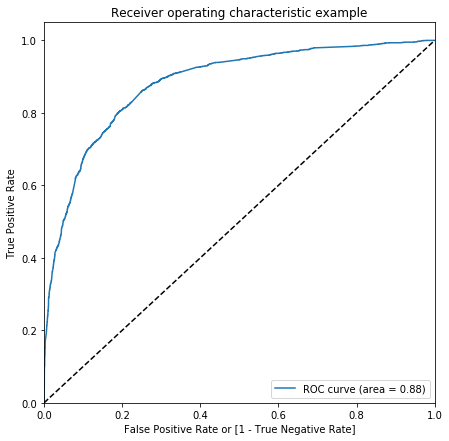

In [264]:
draw_roc(y_train_pred_final.Converted,y_train_pred_final.Converted_Prob)

### <font color = blue> Observation: ROC Curve 0.88

## <font color = brown> Finding Optimal Cutoff Point

In [265]:
 y_train_pred_final.head()

,Converted,Converted_Prob,Sr. Number,Convert_Predict
0,0,0.300340,1871,0
1,0,0.233649,6795,0
2,0,0.346675,3516,0
3,0,0.827240,8105,1
4,0,0.174337,3934,0


In [266]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Sr. Number,Convert_Predict,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.300340,1871,0,1,1,1,1,0,0,0,0,0,0
1,0,0.233649,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.346675,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.827240,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.174337,3934,0,1,1,0,0,0,0,0,0,0,0


In [267]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.606988  0.967153  0.385057
0.2   0.2  0.765306  0.902676  0.680660
0.3   0.3  0.792208  0.857259  0.752124
0.4   0.4  0.807205  0.755880  0.838831
0.5   0.5  0.816017  0.692214  0.892304
0.6   0.6  0.803958  0.615572  0.920040
0.7   0.7  0.779994  0.508516  0.947276
0.8   0.8  0.757267  0.408354  0.972264
0.9   0.9  0.716759  0.275750  0.988506


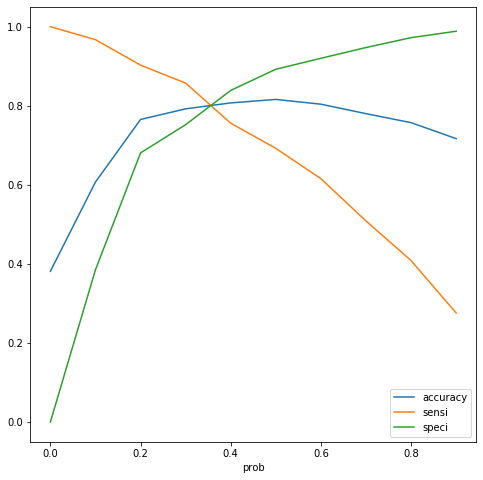

In [268]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],figsize=(8,8))
plt.show()

## <font color = brown> From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [269]:
y_train_pred_final['Convert_predicted2'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Sr. Number,Convert_Predict,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Convert_predicted2
0,0,0.300340,1871,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.233649,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.346675,3516,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.827240,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.174337,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [270]:
# overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Convert_predicted2)

0.8051948051948052

## <font color = brown> Confusion matrix

In [271]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Convert_predicted2)
confusion2

array([[3220,  782],
       [ 478, 1988]], dtype=int64)

In [272]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

In [273]:
# sensitivity, recall, hit rate, or true positive rate (TPR) of our logistic regression model
TP2 / float(TP2+FN2)

0.8061638280616383

In [274]:
# specificity, selectivity or true negative rate (TNR) of our logistic regression model
TN2 / float(TN2+FP2)

0.8045977011494253

In [275]:
# precision or positive predictive value (PPV) of our logistic regression model
TP2 / float(TP2+FP2)

0.7176895306859206

In [276]:
# Negative predictive value (NPV) of our logistic regression model
TN2 / float(TN2+ FN2)

0.8707409410492158

## <font color = brown> Precision and Recall

In [277]:
# sensitivity, recall, hit rate, or true positive rate (TPR) of our logistic regression model
TP2 / float(TP2+FN2)

0.8061638280616383

In [278]:
# precision or positive predictive value (PPV) of our logistic regression model
TP2 / float(TP2+FP2)

0.7176895306859206

In [279]:
recall_train=recall_score(y_train_pred_final.Converted, y_train_pred_final.Convert_predicted2)
print(recall_train)

0.8061638280616383


In [280]:
precision_train=precision_score(y_train_pred_final.Converted, y_train_pred_final.Convert_predicted2)
print(precision_train)

0.7176895306859206


In [281]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

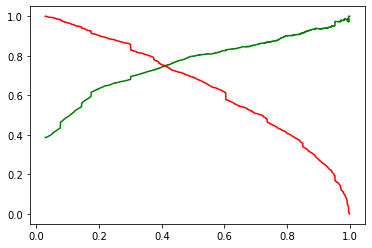

In [282]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## <font color = brown> Calculating the F1 score
F1 = 2×(Precision*Recall)/(Precision+Recall)

In [283]:
F1_train = 2*((precision_train*recall_train)/(precision_train+recall_train))

In [284]:
F1_train

0.7593582887700535

### <font color = blue>F1 Score: 0.7593

## <font color = brown> Making predictions on the test set

In [285]:
# Validating test data set already transformed.
lead_X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Google,Olark Chat,Organic Search,Reference,Referral Sites,Welingak Website,Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Unemployed,Working Professional,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Tier II Cities,Email Link Clicked,Email Opened,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,SMS Sent,Unreachable,Unsubscribed
4269,1.433341,0.964504,2.892276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2376,-1.022595,-0.885371,-1.180474,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7766,0.512365,-0.777416,1.364995,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
9199,-1.022595,-0.885371,-1.180474,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4359,-1.022595,-0.885371,-1.180474,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [286]:
lead_X_test.shape

(2772, 47)

In [287]:
lead_X_test.drop(['TotalVisits',  'Page Views Per Visit',
       'A free copy of Mastering The Interview', 
       'Lead Add Form', 'Lead Import', 'Quick Add Form', 'Google',
       'Organic Search',  'Referral Sites',
        'Business Administration', 'E-Business',
       'E-COMMERCE',  'Healthcare Management',
       'Hospitality Management', 'Human Resource Management',
       'IT Projects Management', 'International Business',
       'Marketing Management', 'Media and Advertising',
       'Operations Management', 'Retail Management', 'Rural and Agribusiness',
       'Services Excellence', 'Supply Chain Management', 'Travel and Tourism',
        'Other Cities',
       'Other Cities of Maharashtra', 'Other Metro Cities',
       'Thane & Outskirts', 'Tier II Cities', 'Email Link Clicked',
       'Email Opened', 
       'Page Visited on Website', 
       'Unsubscribed'], axis=1, inplace=True)

In [288]:
lead_X_test.shape

(2772, 13)

In [289]:
lead_X_test.head()

,Total Time Spent on Website,Landing Page Submission,Olark Chat,Reference,Welingak Website,Finance Management,Unemployed,Working Professional,Had a Phone Conversation,Modified,Olark Chat Conversation,SMS Sent,Unreachable
4269,0.964504,0,0,0,0,0,0,0,0,0,0,1,0
2376,-0.885371,0,0,1,0,0,1,0,0,0,0,1,0
7766,-0.777416,0,0,0,0,0,0,1,0,0,0,0,1
9199,-0.885371,0,1,0,0,0,1,0,0,1,0,0,0
4359,-0.885371,0,0,1,0,0,1,0,0,0,0,0,0


In [290]:
lead_X_test.shape

(2772, 13)

## <font color = brown> Making prediction

In [291]:
lead_X_test_sm = sm.add_constant(lead_X_test)

In [292]:
lead_X_test_sm.head()

,const,Total Time Spent on Website,Landing Page Submission,Olark Chat,Reference,Welingak Website,Finance Management,Unemployed,Working Professional,Had a Phone Conversation,Modified,Olark Chat Conversation,SMS Sent,Unreachable
4269,1.0,0.964504,0,0,0,0,0,0,0,0,0,0,1,0
2376,1.0,-0.885371,0,0,1,0,0,1,0,0,0,0,1,0
7766,1.0,-0.777416,0,0,0,0,0,0,1,0,0,0,0,1
9199,1.0,-0.885371,0,1,0,0,0,1,0,0,1,0,0,0
4359,1.0,-0.885371,0,0,1,0,0,1,0,0,0,0,0,0


In [293]:
lead_X_test_sm.shape

(2772, 14)

In [294]:
lead_y_test_pred = logmodel9.predict(lead_X_test_sm)

In [295]:
lead_y_test_pred[:10]

4269    0.654429
2376    0.952674
7766    0.929879
9199    0.174337
4359    0.849942
9186    0.581816
1631    0.550323
8963    0.235323
8007    0.058280
5324    0.360375
dtype: float64

In [296]:
# Converting y_pred to a dataframe which is an array
lead_y_test_pred = pd.DataFrame(lead_y_test_pred)
lead_y_test_pred.head()

,0
4269,0.654429
2376,0.952674
7766,0.929879
9199,0.174337
4359,0.849942


In [297]:
# Converting y_test to dataframe
lead_y_test = pd.DataFrame(lead_y_test)

In [298]:
# Putting CustID to index
lead_y_test['Sr. Number'] = lead_y_test.index

In [299]:
# Removing index for both dataframes to append them side by side 
lead_y_test_pred.reset_index(drop=True, inplace=True)
lead_y_test.reset_index(drop=True, inplace=True)

In [300]:
# Appending y_test_df and y_pred_1
lead_y_test_pred_final = pd.concat([lead_y_test, lead_y_test_pred],axis=1)

In [301]:
lead_y_test_pred_final.head()

,Converted,Sr. Number,0
0,1,4269,0.654429
1,1,2376,0.952674
2,1,7766,0.929879
3,0,9199,0.174337
4,1,4359,0.849942


In [302]:
# Renaming the column 
lead_y_test_pred_final= lead_y_test_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [303]:
lead_y_test_pred_final.head()

,Converted,Sr. Number,Converted_Prob
0,1,4269,0.654429
1,1,2376,0.952674
2,1,7766,0.929879
3,0,9199,0.174337
4,1,4359,0.849942


In [304]:
#Calculating based on Optimal point 0.35
lead_y_test_pred_final['Convert_Predicted'] = lead_y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [305]:
lead_y_test_pred_final.head()

,Converted,Sr. Number,Converted_Prob,Convert_Predicted
0,1,4269,0.654429,1
1,1,2376,0.952674,1
2,1,7766,0.929879,1
3,0,9199,0.174337,0
4,1,4359,0.849942,1


In [306]:
# Let's check the overall accuracy.
metrics.accuracy_score(lead_y_test_pred_final.Converted, lead_y_test_pred_final.Convert_Predicted)

0.8055555555555556

In [307]:
confusion_test = metrics.confusion_matrix(lead_y_test_pred_final.Converted, lead_y_test_pred_final.Convert_Predicted )
confusion_test

array([[1360,  317],
       [ 222,  873]], dtype=int64)

In [308]:
TP_test = confusion_test[1,1] # true positive 
TN_test = confusion_test[0,0] # true negatives
FP_test = confusion_test[0,1] # false positives
FN_test = confusion_test[1,0] # false negatives

In [309]:
# sensitivity, recall, hit rate, or true positive rate (TPR) of our logistic regression Test model
TP_test / float(TP_test+FN_test)

0.7972602739726027

In [310]:
# precision or positive predictive value (PPV) of our logistic regression Test model
TP_test / float(TP_test+FP_test)

0.7336134453781512

In [311]:
# Calculate false postive rate - predicting Converted, when customer does not have Converted
print(FP_test/ float(TN_test+FP_test))

0.18902802623732856


In [312]:
recall_test=recall_score(lead_y_test_pred_final.Converted, lead_y_test_pred_final.Convert_Predicted)
print(recall_test)

0.7972602739726027


In [313]:
precision_test=precision_score(lead_y_test_pred_final.Converted, lead_y_test_pred_final.Convert_Predicted)
print(precision_test)

0.7336134453781512


## <font color = brown>ROC Curve for Test Dataset

In [314]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(7, 7))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [315]:
fpr, tpr, thresholds = metrics.roc_curve(lead_y_test_pred_final.Converted, lead_y_test_pred_final.Convert_Predicted, drop_intermediate = False )

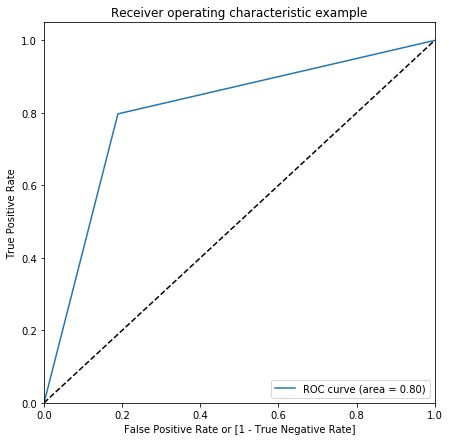

In [316]:
draw_roc(lead_y_test_pred_final.Converted, lead_y_test_pred_final.Convert_Predicted)

### <font color = blue> Observation: ROC Curve for testdataset 0.80

## <font color = brown> Calculating the F1 score for test model
F1 = 2×(Precision*Recall)/(Precision+Recall)

In [317]:
F1_test = 2*((precision_test*recall_test)/(precision_test+recall_test))

In [318]:
F1_test

0.7641137855579868

## <font color = brown> Probability % for all leads for business

In [319]:
# Validating Test data set:
lead_y_test_pred_final.head()

,Converted,Sr. Number,Converted_Prob,Convert_Predicted
0,1,4269,0.654429,1
1,1,2376,0.952674,1
2,1,7766,0.929879,1
3,0,9199,0.174337,0
4,1,4359,0.849942,1


In [320]:
# Validating train data set: 
y_train_pred_final.head(10)

,Converted,Converted_Prob,Sr. Number,Convert_Predict,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Convert_predicted2
0,0,0.300340,1871,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.233649,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.346675,3516,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.827240,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.174337,3934,0,1,1,0,0,0,0,0,0,0,0,0
5,1,0.990335,4844,1,1,1,1,1,1,1,1,1,1,1,1
6,0,0.120067,3297,0,1,1,0,0,0,0,0,0,0,0,0
7,1,0.985599,8071,1,1,1,1,1,1,1,1,1,1,1,1
8,0,0.150459,987,0,1,1,0,0,0,0,0,0,0,0,0
9,1,0.935805,7423,1,1,1,1,1,1,1,1,1,1,1,1


In [321]:
# Trian Data frame modification before append of both test and train data set
lead_y_train_pred_final = y_train_pred_final.drop(['Convert_Predict',0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], axis=1)
lead_y_train_pred_final.rename(columns={'Convert_predicted2':'Convert_Predicted'}, inplace=True)
lead_y_train_pred_final = pd.DataFrame(lead_y_train_pred_final, columns = ['Converted','Sr. Number','Converted_Prob','Convert_Predicted'])

In [322]:
lead_y_train_pred_final.head()

,Converted,Sr. Number,Converted_Prob,Convert_Predicted
0,0,1871,0.300340,0
1,0,6795,0.233649,0
2,0,3516,0.346675,0
3,0,8105,0.827240,1
4,0,3934,0.174337,0


In [323]:
# append of train and test data set for Final Dataset
lead_df_pred = lead_y_train_pred_final.append(lead_y_test_pred_final)
lead_df_pred.head()

,Converted,Sr. Number,Converted_Prob,Convert_Predicted
0,0,1871,0.300340,0
1,0,6795,0.233649,0
2,0,3516,0.346675,0
3,0,8105,0.827240,1
4,0,3934,0.174337,0


In [324]:
lead_df_pred.shape

(9240, 4)

In [325]:
# Checking Unique column for Serial Number
len(lead_df_pred['Sr. Number'].unique())

9240

In [326]:
# Adding new column with Probability % of Converted leads
lead_df_pred['Converted_Probabilty%'] = lead_df_pred['Converted_Prob'].apply(lambda x : x*100).round(2)
lead_df_pred.head()

,Converted,Sr. Number,Converted_Prob,Convert_Predicted,Converted_Probabilty%
0,0,1871,0.300340,0,30.03
1,0,6795,0.233649,0,23.36
2,0,3516,0.346675,0,34.67
3,0,8105,0.827240,1,82.72
4,0,3934,0.174337,0,17.43


In [327]:
# Setting Sr. Number as Index and Sorting of Index
lead_df_pred = lead_df_pred.set_index('Sr. Number').sort_index(axis = 0, ascending = True)
lead_df_pred.head()

,Converted,Converted_Prob,Convert_Predicted,Converted_Probabilty%
Sr. Number,,,,
0,0,0.174337,0,17.43
1,0,0.409382,1,40.94
2,1,0.491288,1,49.13
3,0,0.094377,0,9.44
4,1,0.496148,1,49.61


In [328]:
# Creating new DF with Lead Numer from original Data Set
lead_number = lead[['Lead Number']]
lead_number.head()

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


In [329]:
# Final Data Set for Business with Lead Number, Converted, Converted Predication, Converted Probability
lead_final_business = pd.concat([lead_number, lead_df_pred], axis=1)
lead_final_business.head(15)

,Lead Number,Converted,Converted_Prob,Convert_Predicted,Converted_Probabilty%
0,660737,0,0.174337,0,17.43
1,660728,0,0.409382,1,40.94
2,660727,1,0.491288,1,49.13
3,660719,0,0.094377,0,9.44
4,660681,1,0.496148,1,49.61
5,660680,0,0.076410,0,7.64
6,660673,1,0.600747,1,60.07
7,660664,0,0.076410,0,7.64
8,660624,0,0.049419,0,4.94
9,660616,0,0.099967,0,10.00


## <font color = blue> Observation: Data Set- lead_final_business
  Final Data Set for Business with Lead Number, Converted, Converted Predication, Converted Probability  

# <font color = brown> Overall Final Results

In [330]:
final_feature=logmodel9.params
final_feature

const                         -1.683709
Total Time Spent on Website    1.093008
Landing Page Submission       -0.447315
Olark Chat                     0.868793
Reference                      3.448623
Welingak Website               5.206469
Finance Management             0.337836
Unemployed                     0.936953
Working Professional           3.456307
Had a Phone Conversation       3.500256
Modified                      -0.709519
Olark Chat Conversation       -1.133033
SMS Sent                       1.268065
Unreachable                    1.661949
dtype: float64

In [331]:
final_feature.abs()

const                          1.683709
Total Time Spent on Website    1.093008
Landing Page Submission        0.447315
Olark Chat                     0.868793
Reference                      3.448623
Welingak Website               5.206469
Finance Management             0.337836
Unemployed                     0.936953
Working Professional           3.456307
Had a Phone Conversation       3.500256
Modified                       0.709519
Olark Chat Conversation        1.133033
SMS Sent                       1.268065
Unreachable                    1.661949
dtype: float64

# <font color = blue> Top features / predictor
    
    1. Lead Source: Welingak Website: 5.206469
    2. Last Notable Activity: Had a Phone Conversation: 3.500256
    3. What is your current occupation: Working Professional: 3.456307
    4. Lead Source: Reference: 3.448623   
    5. Last Notable Activity: Unreachable: 1.661949
    6. Last Activity: SMS Sent: 1.268065  
    7. Last Notable Activity: Olark Chat Conversation: 1.133033
    8. Total Time Spent on Website: 1.093008    
    9. What is your current occupation: Unemployed: 0.936953    
    10. Lead Source: Olark Chat: 0.868793
    11. Last Notable Activity: Modified: 0.709519        
    12. Lead Origin: Landing Page Submission: 0.447315
    13. Specialization: Finance Management: 0.337836


# <font color = blue> Final promising leads Information with Converted probability Percentage

In [332]:
lead_final_business.head(15)

,Lead Number,Converted,Converted_Prob,Convert_Predicted,Converted_Probabilty%
0,660737,0,0.174337,0,17.43
1,660728,0,0.409382,1,40.94
2,660727,1,0.491288,1,49.13
3,660719,0,0.094377,0,9.44
4,660681,1,0.496148,1,49.61
5,660680,0,0.076410,0,7.64
6,660673,1,0.600747,1,60.07
7,660664,0,0.076410,0,7.64
8,660624,0,0.049419,0,4.94
9,660616,0,0.099967,0,10.00


In [333]:
lead_final_business[lead_final_business['Converted_Probabilty%']>35.00].count()

Lead Number              3960
Converted                3960
Converted_Prob           3960
Convert_Predicted        3960
Converted_Probabilty%    3960
dtype: int64

# <font color = blue> Variable Scores:
0.35 is the optimum point to take it as a cutoff probability
    
**Train Data Set**:
1. overall accuracy: 0.806
2. sensitivity, recall, hit rate, or true positive rate (TPR): 0.806
3. precision or positive predictive value (PPV): 0.717
4. F1 Score:0.759
    
**Test Data Set**:
1. overall accuracy: 0.805
2. sensitivity, recall, hit rate, or true positive rate (TPR): 0.797
3. precision or positive predictive value (PPV): 0.733
4. FI Score:0.764
    
    

# <font color = brown> Thank You